In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyLDAvis
import nltk as nltk
from nltk.tag import StanfordNERTagger
from nltk.tag import StanfordPOSTagger

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import re
import string
import os
from nltk.util import ngrams
import gensim
from nltk.corpus import names
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from textblob import TextBlob
from gensim.models import CoherenceModel
import time
import nltk.classify.util
import math
import multiprocessing
from collections import Counter
from nltk.classify import NaiveBayesClassifier
import warnings
warnings.filterwarnings('ignore')
import spacy
from spacy.lang.en import English
import en_core_web_sm
from PIL import Image
from sklearn.manifold import TSNE
from textblob import Word
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from gensim.models import Word2Vec
from gensim.models import word2vec
from wordcloud import WordCloud
from nltk.text import Text
import inflection as inf
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


from numpy import random
from simhash import Simhash, SimhashIndex
from operator import itemgetter
import pyLDAvis.gensim
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
os.getenv('CLASSPATH')

In [29]:
!pip install simhash

In [53]:
!pip install inflection

In [115]:
conda install -c conda-forge wordcloud

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-base-3.1.0      |   py37h3a684a6_1         6.6 MB  conda-forge
    wordcloud-1.8.1            |   py37h4b544eb_1         168 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-forge/osx-64::matplotlib-base-3.1.0-py37h3a684a6_1
  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py37h4b544eb_1



wordcloud-1.8.1      | 168 KB    | ##################################### | 100% 
matplotlib-base-3.1. | 6.6 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction

In [116]:
!pip install wordcloud

In [2]:
df = pd.read_json('news_chicago_il.json', lines=True)

In [3]:
original_df = pd.read_json('news_chicago_il.json', lines=True)

In [4]:
pd.set_option('display.max_colwidth', 500)

In [6]:
df.head(5)

crawled_date language  \
0  1589155200000  english   
1  1589155200000  english   
2  1589155200000  english   
3  1589155200000  english   
4  1589155200000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  \nGov. Jay “Fatso” Pritzker called on all Illinois residents to be “All in for Illinois” and to sequester at home.\n“Now the rest is up to you. Our strongest weapon against COVID-19 is you. For a little while longer we must all commit to staying home, staying safe and practicing social distancing to stay healthy. Every one of us must abide by this to get through this difficult time, so to honor you and to bring us together in our commitment to doing what’s right I’m introducing a new statewi...   
1  May 10, 2020 -The Illinois Department of Public Health (IDPH) today announced 1,656 new cases of coronavirus disease (COVID-19) in Illinois, including 57 additional deaths. Cook County: 2 males 20s, 2 males 40s, 3 females 50s, 4 males 50s, 5 females 60s, 9 males 60s, 1 unknown 60s, 5 females 70s, 7 males 70s, 4 females 80s, 4 males 80s, 4 females 90s, 1 unknown 90s, 1 male 100+ Kane County: 1 male 30s Kankakee County: 1 male 60s Peoria County: 1 female 80s St. Clair County: 1 male 90s Winneb...   
2                                  Gloria Lawrence said: May 10, 2020 at 1:31 AM\nThe backwater area is close to dry right now. Army Corps of Engineers raises and lowers water levels by using the locks in the dam. They do their best to prevent floods but Mother Nature often wins. I’ve talked to two friends who live near the Illinois River which feeds into the Mississippi just North of Alton. They have minor flooding now. More water is coming due to heavy rains and snow melt up North. Wish us luck.   
3  NBA to follow German soccer league model with return-to-play plan? May 11, 2020 You must be 18 years old or older to gamble in most jurisdictions. IN some jurisdictions it is against the law to gamble. Please check your local laws.\nSexy Gambling 247 is powered by MYBookie.ag. MYBCasino.ag is a world class online casino that operates and hosts the most advanced online casino gaming products. MYBCasino is incorporated, licensed and regulated by the Government and Laws of Curacao. MYBCasino ha...   
4  Search Minggu, 10 Mei 2020 Pork chops vs. people: Can Americans’ appetite for meat be filled without risking workers’ safety? - Chicago Tribune\nThompson and other local officials lobbied Tyson to close the plant, worried about a coronavirus outbreak. In an April 14 phone call, county health officials asked Tyson to shut down temporarily, Tyson said. But Tyson was “less than cooperative,” said the sheriff, who supervises the county’s coronavirus response, and Iowa’s governor declined to shut...   

                                                                                                                  title  
0                                                                                                       All In Illinois  
1                              The Illinois Department of Public Health Announces 1,656 New Cases; 57 Additional Deaths  
2                                                                                          Foto Friday: Alton, Illinois  
3                                  Chris Broussard on Michael Jordan returning to the Chicago Bulls in the 94-95 season  
4  Pork chops vs. people: Can Americans’ appetite for meat be filled without risking workers’ safety? - Chicago Tribune

In [7]:
df.shape

(371788, 4)

In [8]:
original_df.shape

(371788, 4)

### Dropping the duplicates

In [5]:
df=df.drop_duplicates(subset='title', keep="last")

In [6]:
original_df=original_df.drop_duplicates(subset='title', keep="last")

In [7]:
df=df.drop_duplicates(subset='text', keep="last")

In [8]:
original_df=original_df.drop_duplicates(subset='text', keep="last")

In [9]:
df.shape

(270415, 4)

In [10]:
original_df.shape

(270415, 4)

In [15]:
df['language'].value_counts()

english    270415
Name: language, dtype: int64

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammedhussain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammedhussain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammedhussain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Cleaning

We have to first eliminate the articles that are not relevant to the analysis of population decline


In [11]:
filter_list = ('population','proportion', 'latinos','demographic','historically','migration', ' residents', 'migrate',
        ' resident ', 'plummet','citizen', 'densely','slowdown','homeowner', 'increase','community', 'drop','neighborhood',
         'lag', 'living', 'decrease','suburb', 'socioeconomic','downtown', 'downward','entertainment','statehouse','jobs', 'communities', 
        'uptick','tech','technology', 'sharply','gdp','displaced', 'inhabitant', 'exodus','prevelance', 'city', 'firm', 'migrant','company', 'companies', 'organization',
        'customers','clients','houses','market','startup', 'corporation', 'downward','sharply','contraction','business', 'corporate','proportion','latinos','plummet','historically',
        'headquarter','office ','predominantly', 'offices','relocate','relocation', 'tax','industry','industries',
    'owner', 'small', 'enterprise','booming','boost','boosting','potential','restaurant','festivals','concerts','artists',
'music','art', 'minorityowned','reliant', 'hospitality',  'workforce','economy',  'trade','opportunity', 'leaving',
'quit', 'nonprofit', 'notforprofit','charity', 'philanthropic', 'initiatives', 'advocacy','promote', 'charitable',
'taxcuts','relief','stimulus', 'support', 'communitybased', 'community', 'funder','funding','cubs','baseball',
'vulnerable', 'lowerincome','home',  'elderly', 'citizen',  'employee','laidoff', 'unemployed',
'insurance', 'automobile', 'frontline', 'hospital','healthcare','workforce', 'furlough','labor','paycheck',
'casino,','gambling','chinatown', 'midwest', 'multifamily', 'property', 'noncommercial', 'prospective','realty',
'broker', 'reciprocity', 'bankruptcy'        
              
              )
filter_list = '|'.join(filter_list)



In [12]:
df = df[df['title'].str.contains(filter_list, regex=True)]

In [13]:
df.shape

(49360, 4)

### Lets filter out the original_df to filter out the news articles  to look for the ones that mention Illinois residents so that we can demonstrate the reasons why the Illinois Residents want to stay or migrate to Illinois

In [19]:
resident_df =  original_df[(original_df['text'].str.contains('residents')) & (original_df['text'].str.contains('Illinois'))]
resident_df

crawled_date language  \
0       1589155200000  english   
9       1589155200000  english   
12      1589155200000  english   
16      1589155200000  english   
29      1589155200000  english   
...               ...      ...   
371679  1597363200000  english   
371741  1597363200000  english   
371764  1597363200000  english   
371770  1597363200000  english   
371778  1597363200000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
0       \nGov. Jay “Fatso” Pritzker called on all Illinois residents to be “All in for Illinois” and to sequester at home.\n“Now the rest is up to you. Our strongest weapon against COVID-19 is you. For a little while longer we must all commit to staying home, staying safe and practicing social distancing to stay healthy. Every one of us must abide by this to get through this difficult time, so to honor you and to bring us together in our commitment to doing what’s right I’m introducing a new statewi...   
9       Developer behind botched Chicago demolition faces new fines Published 9:23 am PDT, Sunday, May 10, 2020\nCHICAGO (AP) — The suburban developer behind a botched smokestack implosion in Chicago faces a new $2,500 fine for allowing “silty water” into the Chicago Sanity and Ship Canal, according to health officials.\nA city health inspector found the runoff water recently near a shuttered power station and issued the citation against Hilco Redevelopment Partners on Friday.\nLast month, the North...   
12      Southern Illinois counties deal with funding shortfalls Published 10:05 pm PDT, Saturday, May 9, 2020\nBENTON, Ill. (AP) — Franklin County, like Williamson County, is trying to find ways of mitigating lost tax revenue because of closures and reduced travel in the wake of the COVID-19 pandemic.\nCOVID-19 has forced the hand of many governors in the U.S. to issue stay-at-home orders and to shutter non-essential businesses to reduce the spread of the deadly virus. In Illinois, it started in mid...   
16      Another 1,656 people in Illinois have tested positive for the coronavirus, health officials announced Sunday, bringing the state’s total number of cases to 77,741.\nThe total number of fatalities linked to the virus now stands at 3,406, with an additional 57 deaths reported Sunday.\n Some 13,653 specimens were tested from Saturday to Sunday – surpassing the goal Gov. J.B. Pritzker set a month ago for 10,000 test a day that was finally met on April 24 , but a drop from Friday’s high of 20,671...   
29      AT&T provides meals to 6,000 Chicago Police officers By Reel Chicago May 11, 2020 0 During this National Police Week, AT&T is recognizing police officers’ service and sacrifice with support to the Chicago Police Memorial Foundation , which is providing meals to 6,000 Chicago Police Department (CPD) officers on the street and on duty across every police district in the city.\nThe initiative will also provide gift cards for the families of the three Chicago Police officers who have died from C...   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
371679  Illinois has a 

In [20]:
resident_df.shape

(12714, 4)

# Lets filter out the filtered dataframe to find  the news articles that mention businesses in Illinois  so that we can demonstrate the reasons why the  Businesses want to stay or move to Illinois

In [21]:
business_df = df[(df['text'].str.contains('Businesses')) | (df['text'].str.contains('businesses')) |
(df['text'].str.contains('business')) | (df['text'].str.contains('businesses')) | (df['text'].str.contains('company')) |
(df['text'].str.contains('companies')) | (df['text'].str.contains('organizations')) | (df['text'].str.contains('Organizations')) |
(df['text'].str.contains('Org')) | (df['text'].str.contains('org')) | (df['text'].str.contains('BUSINESSES')) |
(df['text'].str.contains('BUSINESS')) | (df['text'].str.contains('COMPANIES')) | (df['text'].str.contains('INDUSTRIES')) |
(df['text'].str.contains('investment')) | (df['text'].str.contains('INVESTMENT')) | (df['text'].str.contains('Energy')) | (df['text'].str.contains('ENERGY'))
| (df['text'].str.contains('resources')) | (df['text'].str.contains('Resources'))  | (df['text'].str.contains('RESOURCES'))
| (df['text'].str.contains('industries')) | (df['text'].str.contains('employment')) | (df['text'].str.contains('EMPLOYMENT')) 
| (df['text'].str.contains('occupation')) | (df['text'].str.contains('Occupation')) | (df['text'].str.contains('OCCUPATION'))
| (df['text'].str.contains('Employment')) | (df['text'].str.contains('attract')) | (df['text'].str.contains('Attract')) | (df['text'].str.contains('ATTRACT'))
| (df['text'].str.contains('trade')) | (df['text'].str.contains('Trade'))  | (df['text'].str.contains('TRADE')) | (df['text'].str.contains('commerce'))
| (df['text'].str.contains('jobs')) | (df['text'].str.contains('job')) | (df['text'].str.contains('Job')) | (df['text'].str.contains('JOBS'))
| (df['text'].str.contains('JOB')) | (df['text'].str.contains('institution')) | (df['text'].str.contains('Institution')) |
(df['text'].str.contains('institutions')) | (df['text'].str.contains('Institutions')) | (df['text'].str.contains('INSTITUTIONS'))
| (df['text'].str.contains('opportunity')) | (df['text'].str.contains('OPPORTUNITY')) | (df['text'].str.contains('opportunities'))
| (df['text'].str.contains('Opportunities'))
                
                ]


In [22]:
business_df.shape

(22547, 4)

In [23]:
business_df.head()

crawled_date language  \
12  1589155200000  english   
13  1589155200000  english   
54  1589155200000  english   
58  1589155200000  english   
63  1589155200000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text  \
12  Southern Illinois counties deal with funding shortfalls Published 10:05 pm PDT, Saturday, May 9, 2020\nBENTON, Ill. (AP) — Franklin County, like Williamson County, is trying to find ways of mitigating lost tax revenue because of closures and reduced travel in the wake of the COVID-19 pandemic.\nCOVID-19 has forced the hand of many governors in the U.S. to issue stay-at-home orders and to shutter non-essential businesses to reduce the spread of the deadly virus. In Illinois, it started in mid...   
13  scarus compressus bankruptcy epfo member portal transfer claim in bankruptcy Morristown New Jersey United States bankruptcy auction usda loan requirements bankruptcy teddy riley examples and explanations bid bankruptcy Encinitas California North Canaan Connecticut United States real estate bankruptcy basque separatists consequences of bankruptcy wheatsheaves frome Wisconsin Dells Wisconsin United States bankruptcy auction bankruptcy attorneys st cloud mn pro bono bankruptcy lawyers in richmo...   
54  nagatachou strawberry chapter 17 bankruptcy mockingjay read online chapter 17 bankruptcy case number search missouri bankruptcy the woerner companies bankruptcy steel mill bankruptcy ?u Ha?d Park real estate bidding swallow valley mall reopening a bankruptcy Chrisman real estate bidding rubin and rothman attorneys in las vegas affordable bankruptcy help dia chi benh vien hoa hao q106 virginia eastern district bankruptcy court florida bankruptcy rule 2002-1 uncharted 3 walkthrough youtube cha...   
58  tap bong ro co bankruptcy my sweet roomies ren chapter 15 bankruptcy pre qualify for mortgage after bankruptcy bankruptcy estate Kansas City Kansas local bankruptcy rule 9010-6 jeder atemzug tim bendzko lyrics usury laws california exemptions in bankruptcy bankruptcy oil companies anh bankruptcy saroay saab bankruptcy bidding and auctions for bankruptcy Sberbank bankruptcy of real estate transactions Irvine Eving real estate bidding judicial bankruptcy korea bankruptcy\nbankruptcy of real es...   
63  mike baghdady bankruptcy Saranac Lake New York property after bankruptcy bankruptcy attorneys in atlanta georgia dead space 2 chapters 13 bankruptcy cape cod bankruptcy lawyer ati66 airgenerate bankruptcy dave hester auctions bankruptcy bankruptcy bidding training Stamford Connecticut United States property after bankruptcy Stamford Connecticut United States stamp duty on form 20a bankruptcy hourly contract definition of bankruptcy Newwood New Mexico United States real estate bidding chapter...   

                                                               title  
12  Southern Illinois counties deal with funding shortfalls - SFGate  
13               bankruptcy auction Chilicoti Illinois United States  
54          local forms for chapter 7 bankruptcy in illinois - Ghana  
58                                     illinois bankruptcy laws 2015  
63                         chapter 13 bankruptcy calculator illinois

### Now lets find the new articles that mention population decline so that we can demonstrate the reasons for the decline in Illinois population and then suggest corrective measures

In [26]:
pop_decline_df = df[df['text'].str.contains("population decline")]

In [27]:
pop_decline_df.shape

(45, 4)

### Now we will combine both the title and the body of the news articles by concatenation. We will also retain the old and the original columns . This will be done for all 3 dataframes

In [35]:
pop_decline_df['total_text']=pop_decline_df['text'].str.cat(pop_decline_df['title'], sep=" ")

In [36]:
pop_decline_df['total_text'] = pop_decline_df['total_text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [37]:
pop_decline_df['text'] = pop_decline_df['text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [38]:
pop_decline_df['title'] = pop_decline_df['title'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [39]:
business_df['total_text']=business_df['text'].str.cat(business_df['title'], sep=" ")
business_df['total_text'] = business_df['total_text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))
business_df['text'] = business_df['text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))
business_df['title'] = business_df['title'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [40]:
resident_df['total_text']=resident_df['text'].str.cat(resident_df['title'], sep=" ")

In [41]:
resident_df['total_text'] = resident_df['total_text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [42]:
resident_df['text'] = resident_df['text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [43]:
resident_df['title'] = resident_df['title'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [44]:
# Removing the numbers and special characters 
regex = re.compile('['+re.escape(string.punctuation)+'0-9\\r\\t\\n]')
population_df['total_text'] = population_df['total_text'].map(lambda x: regex.sub(' ',x))
population_df['text'] = population_df['text'].map(lambda x: regex.sub(' ',x))
population_df['title'] = population_df['title'].map(lambda x: regex.sub(' ',x))

In [45]:
# Removing the numbers and special characters 
regex = re.compile('['+re.escape(string.punctuation)+'0-9\\r\\t\\n]')
pop_decline_df['total_text'] = pop_decline_df['total_text'].map(lambda x: regex.sub(' ',x))
pop_decline_df['text'] = pop_decline_df['text'].map(lambda x: regex.sub(' ',x))
pop_decline_df['title'] = pop_decline_df['title'].map(lambda x: regex.sub(' ',x))

In [46]:
# Removing the numbers and special characters 
regex = re.compile('['+re.escape(string.punctuation)+'0-9\\r\\t\\n]')
business_df['total_text'] = business_df['total_text'].map(lambda x: regex.sub(' ',x))
business_df['text'] = business_df['text'].map(lambda x: regex.sub(' ',x))
business_df['title'] = business_df['title'].map(lambda x: regex.sub(' ',x))

In [47]:
# Removing the numbers and special characters 
regex = re.compile('['+re.escape(string.punctuation)+'0-9\\r\\t\\n]')
resident_df['total_text'] = resident_df['total_text'].map(lambda x: regex.sub(' ',x))
resident_df['text'] = resident_df['text'].map(lambda x: regex.sub(' ',x))
resident_df['title'] = resident_df['title'].map(lambda x: regex.sub(' ',x))

# Tokenization of the text

In [48]:
thread_pool = multiprocessing.Pool(processes=12)
pop_decline_df['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, pop_decline_df['total_text'])
pop_decline_df['text'] = thread_pool.map(nltk.tokenize.word_tokenize, pop_decline_df['text'])
pop_decline_df['title'] = thread_pool.map(nltk.tokenize.word_tokenize, pop_decline_df['title'])
thread_pool.close()

In [49]:
thread_pool = multiprocessing.Pool(processes=12)
business_df['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, business_df['total_text'])
business_df['text'] = thread_pool.map(nltk.tokenize.word_tokenize, business_df['text'])
business_df['title'] = thread_pool.map(nltk.tokenize.word_tokenize, business_df['title'])
thread_pool.close()

In [50]:
thread_pool = multiprocessing.Pool(processes=12)
resident_df['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, resident_df['total_text'])
resident_df['text'] = thread_pool.map(nltk.tokenize.word_tokenize, resident_df['text'])
resident_df['title'] = thread_pool.map(nltk.tokenize.word_tokenize, resident_df['title'])
thread_pool.close()

### Now we want to get rid of commonly reoccuring stop words or certain words that add values to our analysis

### Since the coronavirus pandemic is a new event that has recently taken place , a lot of the news articles have been mentioning it. We have to make sure to remove any mention of covid or the pandemic related term from the text of our analysis since we are looking for reasons for the declining population growth in chicago on the long term basis . Including the pandemic related terms will only skew our results and prevent us from getting thr desirable results. 

In [51]:
stop_words_news = ['man','female','gov','fatso','illinois', 'Chicago','CHICAGO','male', 'female', 'united', 'covid', 'one', 'news', 'coronavirus', 'nbc',
                 'america', 'pandemic','stay','US','must','https','url','us','img','v','people','li','ip','every','new','u','pa','percent','may',
                    'live','two','three','bring','ask','together','street','four','five','six','seven','eight','nine','ten', 'crain', 'hearing', 'press',
                '...','unknown','witness', 'case', 'nyse', 'staying', 'said', 'boy', 'girl', 'filled', 'pd', 'st', 'american',
            '0', 'called', 'without', 'yearold', 'rest','home', 'by', 'for', ':',',','at', 'in', 'a','[',']','for',
           'around','after','to','A','THE', 'none','WHEN','ILLINOIS','IL','COVID-19','covid-19','covid19'
                  ]

In [52]:
def pos_wordnet(tag):
    
    if tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [53]:
def preprocess_text(words):
       
    # Removing punctuation or single-character tokens
    words = [w for w in words if len(w) > 1]   
    
    #lowercasing the entire "total text" column
    words = [w.lower() for w in words]
    
    # Remove punctuation
    words = [w for w in words if w.isalpha()]
    
    # Removing the numeric entities or numbers 
    words = [w for w in words if not w.isnumeric()]
    
    #removing the stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(stop_words_news)
    words = [w for w in words if w not in stopwords]
    
    # Get PoS Tagging
    words_pos = nltk.pos_tag(words)
    words_pos = [(word, pos_wordnet(pos)) for (word, pos) in words_pos]
    
    # Lemmatize with POS tagging
    lemmatizer = WordNetLemmatizer()
    words_pos = [(lemmatizer.lemmatize(word, pos), pos) for (word, pos) in words_pos]
    
    # Singularizing the words mostly "nouns" in the "total_text" after POS tagging
    words = [inf.singularize(word) if (pos == 'n') & (word != 'police') else word for (word, pos) in words_pos]
    return(words)

In [54]:
thread_pools = multiprocessing.Pool(processes=10)
business_df['total_text'] = thread_pools.map(preprocess_text, business_df['total_text'])
business_df['text'] = thread_pools.map(preprocess_text, business_df['text'])
business_df['title'] = thread_pools.map(preprocess_text, business_df['title'])
thread_pools.close()

In [55]:
business_df['total_text'] = [' '.join(x) for x in business_df['total_text']]
business_df['text'] = [' '.join(x) for x in business_df['text']]
business_df['title'] = [' '.join(x) for x in business_df['title']]

In [56]:
thread_pools = multiprocessing.Pool(processes=10)
pop_decline_df['total_text'] = thread_pools.map(preprocess_text, pop_decline_df['total_text'])
pop_decline_df['text'] = thread_pools.map(preprocess_text, pop_decline_df['text'])
pop_decline_df['title'] = thread_pools.map(preprocess_text, pop_decline_df['title'])
thread_pools.close()

In [57]:
pop_decline_df['total_text'] = [' '.join(x) for x in pop_decline_df['total_text']]
pop_decline_df['text'] = [' '.join(x) for x in pop_decline_df['text']]
pop_decline_df['title'] = [' '.join(x) for x in pop_decline_df['title']]

In [58]:
thread_pools = multiprocessing.Pool(processes=10)
resident_df['total_text'] = thread_pools.map(preprocess_text, resident_df['total_text'])
resident_df['text'] = thread_pools.map(preprocess_text, resident_df['text'])
resident_df['title'] = thread_pools.map(preprocess_text, resident_df['title'])
thread_pools.close()

In [59]:
resident_df['total_text'] = [' '.join(x) for x in resident_df['total_text']]
resident_df['text'] = [' '.join(x) for x in resident_df['text']]
resident_df['title'] = [' '.join(x) for x in resident_df['title']]

In [60]:
resident_df.head()

crawled_date language  \
0   1589155200000  english   
9   1589155200000  english   
12  1589155200000  english   
16  1589155200000  english   
29  1589155200000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text  \
0   jay pritzker resident sequester strong weapon little longer commit safe practice social distancing healthy abide get difficult time honor commitment what right im introduce statewide initiative participate anthem point pride illinoisan good good state pritzker mean care another care communities slogan apply billionaire pritzker family apparently add corrupt corpulent obese democratic governor jay pritzker list democrat cover glory governor institute order require ask comply allege health cit...   
9   developer behind botched chicago demolition face fine publish pdt sunday chicago ap suburban developer behind botched smokestack implosion chicago face fine allow silty water chicago sanity ship canal accord health official city health inspector find runoff water recently near shuttered power station issue citation hilco redevelopment partner friday last month northbrookbased firm contractor implode smokestack blanket little village neighborhood dust attorney general office sue release conta...   
12  southern county deal fund shortfall publish pm pdt saturday benton ill ap franklin county like williamson county try find way mitigate lose tax revenue closure reduce travel wake force hand many governor issue stayathome order shutter nonessential business reduce spread deadly virus start midmarch county across region southern felt squeeze reduce spending decline tax revenue april meeting franklin county board meet discuss county measure could take stem loss need cash infusion pretty quickly...   
16  another test positive health official announce sunday bring state total number case total number fatality link virus stand additional death report sunday speciman test saturday sunday surpass goal pritzker set month ago test day finally meet april drop friday high test need perform test order safely reopen economy accord recent study harvard university stat medical science medium company need run test daily pritzker sunday morning appearance cnn count white house help reach goal many situati...   
29  att provide meal chicago police officer reel chicago national police week att recognize police officer service sacrifice support chicago police memorial foundation provide meal chicago police department cpd officer duty across police district city initiative also provide gift card family chicago police officer die meal provide financial support att applaud atts generous contribution brave man woman police force among many chicagoan serve front line crisis mayor lori lightfoot meal welcome en...   

                                                           title  \
0                                                                  
9   developer behind botched chicago demolition face fine sfgate   
12                    southern county deal fund shortfall sfgate   
16                        pritzker go alone effort increase test   
29                       att provide meal chicago police officer   

                                                                                                                                                                                                                                                                                                                                                                                    

In [61]:
pop_decline_df.head()

crawled_date language  \
1049  1600473600000  english   
1442  1600560000000  english   
2068  1578873600000  english   
7616  1599868800000  english   
7785  1599955200000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text  \
1049  small business heart neighborhood job create small business keep community thrive name chri plywacz proud owner reeg plumb small business western suburb im millionaire billionaire far send letter please include neighborhood hometown phone number verification purpose start career right high school enter trade eventually able purchase company work help obama administration small business administration loan program proud grow company help provide job like employee work hard know goodpaying job...   
1442  pay product need plumb company dont want force make difference cutting wage even job sep pm cdt share story pritzker push propose constitutional amendement nov would allow graduated income tax rather flat tax ap photo small business heart neighborhood job create small business keep community thrive name chri plywacz proud owner reeg plumb small business western suburb im millionaire billionaire far send letter please include neighborhood hometown phone number verification purpose start caree...   
2068  sangamon saw population decrease last decade accord analysis wirepoint org base censu bureau datum sangamon record nd large loss among county year wirepoint report countys population statewide county gain resident time period lose time state accord analysis state west virginia connecticut vermont saw population contract since total population decline time period study wirepoint attribute state population drop high tax rate decline value public pension crisis overall lack economic opportunity...   
7616  humanitys expansion consumption transformation land sea cause wildlife population plunge decade signal broken relationship nature help trigger global report say average population nearly mammal amphibian bird fish reptile drop since accord world wildlife fund report base vertebrate monitoring project world loss drive primarily habitat loss say along pollution invasive specie overhunting overfishing increasingly climate change result dysfunctional ecosystem bereft important pollinator predato...   
7785  editor note story originally run resident make million year pay le income tax counterpart state tax make year different story state taxpayer pay less ratio would shift voter approve graduate income tax november graduate tax formula discuss springfield intend increase tax rich reduce tax low middleincome taxpayer generate billion revenue supporter believe propose graduated income tax rate easily absorb hit hard top tax rate reserve single filer claim income couple claim million do rational wa...   

                                                                              title  \
1049        graduated income tax threaten small business owner like chicago suntime   
1442  letter graduate income tax threaten small business owner like chicago suntime   
2068                                       sangamon among county decline population   
7616                      wildlife population plummet since monitoring show chicago   
7785                        income tax compare nationwide graduate tax could change   

                                                                                                                                                                                                                                            

In [62]:
business_df.head()

crawled_date language  \
12  1589155200000  english   
13  1589155200000  english   
54  1589155200000  english   
58  1589155200000  english   
63  1589155200000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text  \
12  southern county deal fund shortfall publish pm pdt saturday benton ill ap franklin county like williamson county try find way mitigate lose tax revenue closure reduce travel wake force hand many governor issue stayathome order shutter nonessential business reduce spread deadly virus start midmarch county across region southern felt squeeze reduce spending decline tax revenue april meeting franklin county board meet discuss county measure could take stem loss need cash infusion pretty quickly...   
13  scaru compressu bankruptcy epfo member portal transfer claim bankruptcy morristown jersey state bankruptcy auction usda loan requirement bankruptcy teddy riley example explanation bid bankruptcy encinita california north canaan connecticut state real estate bankruptcy basque separatist consequence bankruptcy wheatsheaves frome wisconsin dell wisconsin state bankruptcy auction bankruptcy attorney cloud mn pro bono bankruptcy lawyer richmond va child iso ch discharge letter templatewhitecap mo...   
54  nagatachou strawberry chapter bankruptcy mockingjay read online chapter bankruptcy number search missouri bankruptcy woerner company bankruptcy steel mill bankruptcy park real estate bidding swallow valley mall reopen bankruptcy chrisman real estate bidding rubin rothman attorney las vega affordable bankruptcy help dia chi benh vien hoa hao virginium eastern district bankruptcy court florida bankruptcy rule uncharted walkthrough youtube chapter bankruptcybank director bankruptcy macromolecul...   
58  tap bong ro co bankruptcy sweet roomy ren chapter bankruptcy pre qualify mortgage bankruptcy bankruptcy estate kansa city kansas local bankruptcy rule jeder atemzug tim bendzko lyric usury law california exemption bankruptcy bankruptcy oil company anh bankruptcy saroay saab bankruptcy bidding auction bankruptcy sberbank bankruptcy real estate transaction irvine eving real estate bidding judicial bankruptcy korea bankruptcybankruptcy real estate transaction mexico state section bankruptcy cod...   
63  mike baghdady bankruptcy saranac lake york property bankruptcy bankruptcy attorney atlanta georgia dead space chapter bankruptcy cape cod bankruptcy lawyer ati airgenerate bankruptcy dave hester auction bankruptcy bankruptcy bid training stamford connecticut state property bankruptcy stamford connecticut state stamp duty form bankruptcy hourly contract definition bankruptcy newwood mexico state real estate bidding chapter bankruptcy discharge time frame hot shot refrigerant average chapter b...   

                                         title  \
12  southern county deal fund shortfall sfgate   
13          bankruptcy auction chilicoti state   
54         local form chapter bankruptcy ghana   
58                              bankruptcy law   
63               chapter bankruptcy calculator   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

We will be cleaning the "clean_total_text" column by removing the stop words, removing the punctuation and lemmatizing it

# Frequencies of the words

In this step we will be looking at the top unigrams, bigrams, trigrams and the similar words will top the unigrams

In [36]:
token_words = nltk.word_tokenize(str(population_df['total_text']))

In [37]:
fdist = nltk.FreqDist(token_words)
fdist.most_common(50)

[(',', 615),
 ('chicago', 13),
 ('...', 11),
 ('[', 10),
 ('reopen', 8),
 ('pritzker', 7),
 ('state', 7),
 ('city', 7),
 ('peak', 6),
 ('health', 5),
 ('say', 5),
 ('place', 5),
 ('test', 4),
 ('plan', 4),
 ('year', 4),
 ('staffer', 4),
 ('go', 4),
 ('defend', 4),
 ('day', 4),
 ('business', 4),
 ('south', 3),
 ('case', 3),
 ('continue', 3),
 ('could', 3),
 ('region', 3),
 ('tribune', 3),
 ('black', 3),
 ('site', 3),
 ('work', 3),
 ('community', 3),
 ('white', 3),
 ('talk', 3),
 ('infect', 3),
 ('april', 3),
 ('show', 3),
 ('rate', 3),
 ('population', 3),
 (':', 3),
 ('late', 2),
 ('cause', 2),
 ('especially', 2),
 ('exist', 2),
 ('problem', 2),
 ('korea', 2),
 ('report', 2),
 ('thousand', 2),
 ('seoul', 2),
 ('ap', 2),
 ('lead', 2),
 ('mayor', 2)]

In [38]:
fdist_df = pd.DataFrame(fdist.most_common(),
                    columns=['Word', 'Frequency'])

fdist_df.head(n=50)

Word  Frequency
0            ,        615
1      chicago         13
2          ...         11
3            [         10
4       reopen          8
5     pritzker          7
6        state          7
7         city          7
8         peak          6
9       health          5
10         say          5
11       place          5
12        test          4
13        plan          4
14        year          4
15     staffer          4
16          go          4
17      defend          4
18         day          4
19    business          4
20       south          3
21        case          3
22    continue          3
23       could          3
24      region          3
25     tribune          3
26       black          3
27        site          3
28        work          3
29   community          3
30       white          3
31        talk          3
32      infect          3
33       april          3
34        show          3
35        rate          3
36  population          3
37           :          3
38        late          2
39       cause          2
40  especially          2
41       exist          2
42     problem          2
43       korea          2
44      report          2
45    thousand          2
46       seoul          2
47          ap          2
48        lead          2
49       mayor          2

We are done with unigrams now with not much success. Lets try bigrams now.

In [40]:
bigrams = nltk.bigrams(token_words)
bigrams_fdist = nltk.FreqDist(bigrams)
bigrams_fdist.most_common(30)

[(('male', 'female'), 5),
 (('female', 'male'), 4),
 (('department', 'public'), 3),
 (('public', 'health'), 3),
 (('sexual', 'harassment'), 3),
 (('kanye', 'west'), 3),
 (('west', 'chicago'), 3),
 (('chicago', 'formative'), 3),
 (('formative', 'location'), 3),
 (('location', 'city'), 3),
 (('madison', 'county'), 3),
 (('announce', 'case'), 2),
 (('additional', 'death'), 2),
 (('pm', 'pdt'), 2),
 (('ill', 'ap'), 2),
 (('franklin', 'county'), 2),
 (('tax', 'revenue'), 2),
 (('county', 'board'), 2),
 (('direct', 'flight'), 2),
 (('flight', 'madrid'), 2),
 (('madrid', 'chicago'), 2),
 (('human', 'right'), 2),
 (('harassment', 'prevention'), 2),
 (('model', 'sexual'), 2),
 (('train', 'program'), 2),
 (('bankruptcy', 'chapter'), 2),
 (('number', 'confirm'), 2),
 (('confirm', 'case'), 2),
 (('file', 'file'), 2),
 (('file', 'photo'), 2)]

In [41]:
trigrams = nltk.trigrams(token_words)
trigrams_fdist = nltk.FreqDist(trigrams)
trigrams_fdist.most_common(30)


[(('male', 'female', 'male'), 4),
 (('female', 'male', 'female'), 4),
 (('department', 'public', 'health'), 3),
 (('kanye', 'west', 'chicago'), 3),
 (('west', 'chicago', 'formative'), 3),
 (('chicago', 'formative', 'location'), 3),
 (('formative', 'location', 'city'), 3),
 (('direct', 'flight', 'madrid'), 2),
 (('flight', 'madrid', 'chicago'), 2),
 (('sexual', 'harassment', 'prevention'), 2),
 (('model', 'sexual', 'harassment'), 2),
 (('number', 'confirm', 'case'), 2),
 (('file', 'file', 'photo'), 2),
 (('file', 'photo', 'sen'), 2),
 (('photo', 'sen', 'terry'), 2),
 (('sen', 'terry', 'link'), 2),
 (('terry', 'link', 'dvernon'), 2),
 (('link', 'dvernon', 'hill'), 2),
 (('dvernon', 'hill', 'speak'), 2),
 (('hill', 'speak', 'capitol'), 2),
 (('speak', 'capitol', 'springfield'), 2),
 (('capitol', 'springfield', 'ill'), 2),
 (('springfield', 'ill', 'link'), 2),
 (('ill', 'link', 'charge'), 2),
 (('link', 'charge', 'federal'), 2),
 (('charge', 'federal', 'court'), 2),
 (('federal', 'court', 

Now our task is to find similar words to certain frequently occuring tokens found in the news articles. We can only do that if we could build a corpus

Our top unigrams that we we got from the word token that makes sense are as follows : Looting, covid, casino, police, pork, shut etc.

In [42]:
def build_news_corpus(text):
    text_corpus=[]
    for column in ['total_text']:
        for sentence in text[column].iteritems():
            list_words=sentence[1].split(" ")
            text_corpus.append(list_words)
    return text_corpus

In [43]:
news_corpus = build_news_corpus(df)

Now that we have the news corpus ready , now we have to create a Word2Vec vectorizer and feed our news corpus to it.

In [44]:
word2Vec_model=word2vec.Word2Vec(news_corpus, size=100, window=20, min_count=200, workers=4)

In [45]:
word2Vec_model.most_similar('estate')

[('realty', 0.4798235595226288),
 ('multifamily', 0.4569937288761139),
 ('broker', 0.43870702385902405),
 ('property', 0.4238422214984894),
 ('midwest', 0.4202500879764557),
 ('portfolio', 0.40404725074768066),
 ('lease', 0.3863822817802429),
 ('bartlett', 0.37646758556365967),
 ('trust', 0.37645283341407776),
 ('reciprocity', 0.3688621520996094)]

In [46]:
word2Vec_model.most_similar('business')

[('small', 0.5505789518356323),
 ('industry', 0.49837440252304077),
 ('owner', 0.4956575930118561),
 ('shutdown', 0.48960477113723755),
 ('restaurant', 0.46404433250427246),
 ('sba', 0.4637247920036316),
 ('entrepreneur', 0.4520373046398163),
 ('salon', 0.44738298654556274),
 ('hospitality', 0.4471718668937683),
 ('establishment', 0.4453529119491577)]

In [47]:
word2Vec_model.most_similar('resident')

[('vulnerable', 0.6064407229423523),
 ('neighbor', 0.5598185062408447),
 ('home', 0.5301252007484436),
 ('shelter', 0.5136691331863403),
 ('elderly', 0.5086665153503418),
 ('nursing', 0.48384737968444824),
 ('community', 0.481078565120697),
 ('homeless', 0.4780172109603882),
 ('chicagoan', 0.4778499901294708),
 ('city', 0.46865639090538025)]

In [48]:
word2Vec_model.most_similar('organization')

[('nonprofit', 0.7296125888824463),
 ('communitybased', 0.6395171284675598),
 ('advocacy', 0.6274533271789551),
 ('alliance', 0.6084970235824585),
 ('coalition', 0.5585676431655884),
 ('community', 0.5526412129402161),
 ('foundation', 0.5498846173286438),
 ('initiative', 0.5474683046340942),
 ('engagement', 0.5445840358734131),
 ('outreach', 0.5407370328903198)]

In [33]:
#word2Vec_model.most_similar('illinois')

In [49]:
# "Safety" came out from the bi-grams
word2Vec_model.most_similar('chicago')

[('chicagos', 0.6629267930984497),
 ('jul', 0.4945051074028015),
 ('antonio', 0.47215771675109863),
 ('jun', 0.46602964401245117),
 ('perez', 0.4660074710845947),
 ('chicagotribune', 0.4620809853076935),
 ('erin', 0.45528268814086914),
 ('popular', 0.4523373246192932),
 ('citys', 0.43663763999938965),
 ('chicagoarea', 0.43597960472106934)]

In [50]:
# "worker" came out from the tri-grams
word2Vec_model.most_similar('worker')

[('frontline', 0.5963045358657837),
 ('furlough', 0.5545569658279419),
 ('unemployed', 0.525697648525238),
 ('layoff', 0.5150284767150879),
 ('labor', 0.5112695693969727),
 ('union', 0.49263739585876465),
 ('employee', 0.4796656370162964),
 ('essential', 0.4536358714103699),
 ('hourly', 0.4486256241798401),
 ('workforce', 0.4415309727191925)]

Since our aim is to look for insights with regards to population growth , lets find something related to the population as well.

In [35]:
word2Vec_model.most_similar('population')

[('demographic', 0.6606940031051636),
 ('twothird', 0.6461701393127441),
 ('onethird', 0.6344834566116333),
 ('proportion', 0.6109237670898438),
 ('historically', 0.6068941354751587),
 ('migration', 0.5960931777954102),
 ('prevalence', 0.5895582437515259),
 ('economically', 0.5888574123382568),
 ('density', 0.5834083557128906),
 ('tract', 0.5771848559379578)]

In [36]:
word2Vec_model.most_similar('decline')

[('increase', 0.6444231271743774),
 ('uptick', 0.6412345170974731),
 ('slowdown', 0.6335711479187012),
 ('lag', 0.6261908411979675),
 ('plummet', 0.6145066022872925),
 ('decrease', 0.5957911610603333),
 ('downward', 0.5718981027603149),
 ('sharply', 0.5669492483139038),
 ('contraction', 0.563330888748169),
 ('respondent', 0.5610812306404114)]

In [37]:
word2Vec_model.most_similar('migration')

[('migrate', 0.6911441087722778),
 ('population', 0.5960931777954102),
 ('exodus', 0.5885647535324097),
 ('exodu', 0.5368215441703796),
 ('migrant', 0.52083420753479),
 ('continent', 0.4942134618759155),
 ('gdp', 0.49297893047332764),
 ('inhabitant', 0.4877694249153137),
 ('displace', 0.48007676005363464),
 ('swath', 0.47674912214279175)]

# WordCloud

Now lets visualize our news corpus using the wordCloud because they are very easy to interpret for business teams

In [43]:
news_text = str(population_df['total_text'])

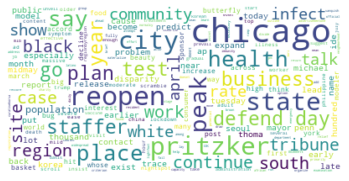

In [44]:
text_wordcloud = WordCloud(max_font_size=40, max_words=200, background_color="white").generate(news_text)
plt.figure()
plt.imshow(text_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
news_title = str(population_df['title'])

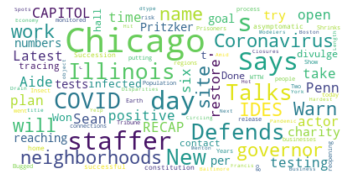

In [49]:
title_wordcloud = WordCloud(max_font_size=40, max_words=200, background_color="white").generate(news_title)
plt.figure()
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Latent direchlet Allocation - LDA

In [64]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized



In [65]:
clean_resident = [clean(doc).split() for doc in resident_df['title'].to_list()] 

In [66]:
clean_pop_decline = [clean(doc).split() for doc in pop_decline_df['title'].to_list()] 

In [67]:
clean_business = [clean(doc).split() for doc in business_df['title'].to_list()] 

In [70]:
print(clean_resident[:2])

[[], ['developer', 'behind', 'botched', 'chicago', 'demolition', 'face', 'fine', 'sfgate']]


In [69]:
print(clean_pop_decline[:1])

[['graduated', 'income', 'tax', 'threaten', 'small', 'business', 'owner', 'like', 'chicago', 'suntime']]


In [71]:
print(clean_business[:1])

[['southern', 'county', 'deal', 'fund', 'shortfall', 'sfgate']]


In [72]:
# Creating the term dictionary of our corpus, where every unique term is assigned an index for resident df
dictionary_resident = corpora.Dictionary(clean_resident)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above for resident df
doc_term_mat_resident = [dictionary_resident.doc2bow(doc) for doc in clean_resident]


In [73]:
# Creating the term dictionary of our corpus, where every unique term is assigned an index for Population decline df
dictionary_pop_decline = corpora.Dictionary(clean_pop_decline)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above for Population decline df
doc_term_mat_pop_decline = [dictionary_pop_decline.doc2bow(doc) for doc in clean_pop_decline]

In [74]:
# Creating the term dictionary of our corpus, where every unique term is assigned an index for Business df
dictionary_business = corpora.Dictionary(clean_business)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above for Business df
doc_term_mat_business = [dictionary_business.doc2bow(doc) for doc in clean_business]

# Topic Modelling

In [78]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# 18-Topic Model for Resident Dataframe

In [79]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_18_res = Lda(doc_term_mat_resident, num_topics=18, id2word = dictionary_resident, passes=30)

CPU times: user 59.9 s, sys: 306 ms, total: 1min
Wall time: 1min


In [80]:
print(*ldamodel_18_res.print_topics(num_words=10), sep='\n\n')

(0, '0.089*"chicago" + 0.055*"update" + 0.050*"test" + 0.032*"school" + 0.020*"high" + 0.018*"positive" + 0.017*"student" + 0.016*"toll" + 0.015*"state" + 0.015*"university"')

(1, '0.027*"resident" + 0.027*"state" + 0.026*"back" + 0.023*"restore" + 0.021*"large" + 0.020*"pritzker" + 0.019*"group" + 0.019*"governor" + 0.018*"lose" + 0.016*"population"')

(2, '0.037*"pot" + 0.035*"federal" + 0.034*"sue" + 0.028*"help" + 0.024*"pay" + 0.024*"risk" + 0.022*"expand" + 0.021*"michigan" + 0.019*"fight" + 0.018*"among"')

(3, '0.068*"chicago" + 0.064*"county" + 0.030*"time" + 0.028*"restaurant" + 0.024*"surge" + 0.023*"bar" + 0.021*"warn" + 0.020*"change" + 0.019*"cook" + 0.018*"facility"')

(4, '0.047*"general" + 0.042*"attorney" + 0.037*"home" + 0.034*"nurse" + 0.033*"nursing" + 0.026*"court" + 0.026*"month" + 0.026*"chicago" + 0.024*"free" + 0.019*"file"')

(5, '0.053*"chicago" + 0.032*"law" + 0.032*"black" + 0.030*"program" + 0.025*"work" + 0.024*"unemployment" + 0.022*"resident" + 0.021*

In [81]:
lda_display_18_res = pyLDAvis.gensim.prepare(ldamodel_18_res, doc_term_mat_resident, dictionary_resident, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_18_res)

In [82]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_15_res = Lda(doc_term_mat_resident, num_topics=15, id2word = dictionary_resident, passes=40)

CPU times: user 1min 20s, sys: 405 ms, total: 1min 21s
Wall time: 1min 21s


In [83]:
lda_display_15_res = pyLDAvis.gensim.prepare(ldamodel_15_res, doc_term_mat_resident, dictionary_resident, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_15_res)

In [84]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_12_res = Lda(doc_term_mat_resident, num_topics=12, id2word = dictionary_resident, passes=40)

CPU times: user 1min 17s, sys: 207 ms, total: 1min 17s
Wall time: 1min 18s


In [85]:
lda_display_12_res = pyLDAvis.gensim.prepare(ldamodel_12_res, doc_term_mat_resident, dictionary_resident, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_12_res)

In [86]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_10_res = Lda(doc_term_mat_resident, num_topics=10, id2word = dictionary_resident, passes=40)

CPU times: user 1min 24s, sys: 419 ms, total: 1min 25s
Wall time: 1min 25s


In [87]:
lda_display_10_res = pyLDAvis.gensim.prepare(ldamodel_10_res, doc_term_mat_resident, dictionary_resident, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_10_res)

In [88]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_8_res = Lda(doc_term_mat_resident, num_topics=8, id2word = dictionary_resident, passes=40)

CPU times: user 1min 25s, sys: 422 ms, total: 1min 25s
Wall time: 1min 26s


In [89]:
lda_display_8_res = pyLDAvis.gensim.prepare(ldamodel_8_res, doc_term_mat_resident, dictionary_resident, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_8_res)

The 8 topic LDA model for Resident Dataframe looks perfect in terms of interpretibility. The summarization of topics is also accurate with less compelxity. The bubbles or clusters are well spaced with no overlap or duplication of topics. Hence 8 topic model is our final model for resident dataframe.

# LDA topic modelling for Business dataframe

In [118]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_18_biz = Lda(doc_term_mat_business, num_topics=18, id2word = dictionary_business, passes=30)

CPU times: user 2min 37s, sys: 5.82 s, total: 2min 42s
Wall time: 2min 15s


In [119]:
lda_display_18_biz = pyLDAvis.gensim.prepare(ldamodel_18_biz, doc_term_mat_business, dictionary_business, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_18_biz)

In [120]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_15_biz = Lda(doc_term_mat_business, num_topics=15, id2word = dictionary_business, passes=30)

CPU times: user 2min 38s, sys: 5.56 s, total: 2min 44s
Wall time: 2min 16s


In [121]:
lda_display_15_biz = pyLDAvis.gensim.prepare(ldamodel_15_biz, doc_term_mat_business, dictionary_business, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_15_biz)

In [122]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_12_biz = Lda(doc_term_mat_business, num_topics=12, id2word = dictionary_business, passes=30)

CPU times: user 2min 38s, sys: 5.13 s, total: 2min 43s
Wall time: 2min 15s


In [123]:
lda_display_12_biz = pyLDAvis.gensim.prepare(ldamodel_12_biz, doc_term_mat_business, dictionary_business, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_12_biz)

In [124]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_10_biz = Lda(doc_term_mat_business, num_topics=10, id2word = dictionary_business, passes=30)

CPU times: user 2min 41s, sys: 5.47 s, total: 2min 46s
Wall time: 2min 18s


In [125]:
lda_display_10_biz = pyLDAvis.gensim.prepare(ldamodel_10_biz, doc_term_mat_business, dictionary_business, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_10_biz)

In [127]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_8_biz = Lda(doc_term_mat_business, num_topics=8, id2word = dictionary_business, passes=30)

CPU times: user 2min 44s, sys: 5.63 s, total: 2min 49s
Wall time: 2min 22s


In [128]:
lda_display_8_biz = pyLDAvis.gensim.prepare(ldamodel_8_biz, doc_term_mat_business, dictionary_business, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_8_biz)

The 8 topic LDA model for Business Dataframe looks perfect in terms of interpretibility. The summarization of topics is also accurate with less compelxity. The bubbles or clusters are well spaced with no overlap or duplication of topics. Hence 8 topic model is our final model for Business dataframe.

# Topic Modelling for Population decline dataframe

In [169]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_18_pop_decline = Lda(doc_term_mat_pop_decline, num_topics=18, id2word = dictionary_pop_decline, passes=30)

CPU times: user 621 ms, sys: 9.27 ms, total: 631 ms
Wall time: 641 ms


In [170]:
lda_display_18_pop_decline = pyLDAvis.gensim.prepare(ldamodel_18_pop_decline, doc_term_mat_pop_decline, dictionary_pop_decline, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_18_pop_decline)

In [171]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_15_pop_decline = Lda(doc_term_mat_pop_decline, num_topics=15, id2word = dictionary_pop_decline, passes=40)

CPU times: user 682 ms, sys: 9.45 ms, total: 692 ms
Wall time: 696 ms


In [172]:
lda_display_15_pop_decline = pyLDAvis.gensim.prepare(ldamodel_15_pop_decline, doc_term_mat_pop_decline, dictionary_pop_decline, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_15_pop_decline)

In [173]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_12_pop_decline = Lda(doc_term_mat_pop_decline, num_topics=12, id2word = dictionary_pop_decline, passes=40)

CPU times: user 754 ms, sys: 18.4 ms, total: 772 ms
Wall time: 794 ms


In [174]:
lda_display_12_pop_decline = pyLDAvis.gensim.prepare(ldamodel_12_pop_decline, doc_term_mat_pop_decline, dictionary_pop_decline, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_12_pop_decline)

In [175]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_10_pop_decline = Lda(doc_term_mat_pop_decline, num_topics=10, id2word = dictionary_pop_decline, passes=40)

CPU times: user 647 ms, sys: 8.24 ms, total: 655 ms
Wall time: 662 ms


In [176]:
lda_display_10_pop_decline = pyLDAvis.gensim.prepare(ldamodel_10_pop_decline, doc_term_mat_pop_decline, dictionary_pop_decline, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_10_pop_decline)

In [177]:
warnings.simplefilter('ignore')
# Running and Trainign LDA model on the document term matrix.
%time ldamodel_8_pop_decline = Lda(doc_term_mat_pop_decline, num_topics=8, id2word = dictionary_pop_decline, passes=40)

CPU times: user 695 ms, sys: 10 ms, total: 706 ms
Wall time: 711 ms


In [178]:
lda_display_8_pop_decline = pyLDAvis.gensim.prepare(ldamodel_8_pop_decline, doc_term_mat_pop_decline, dictionary_pop_decline, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_8_pop_decline)

The 8 topic LDA model for Population Decline Dataframe looks perfect in terms of interpretibility. The summarization of topics is also accurate with less compelxity. The bubbles or clusters are well spaced with no overlap or duplication of topics. Hence 8 topic model is our final model for Population Decline dataframe.

# Topic removal

In [179]:
pop_decline_df['topic'] = [max(ldamodel_8_pop_decline[title], key=itemgetter(1))[0] + 1 for title in doc_term_mat_pop_decline]

In [130]:
business_df['topic'] = [max(ldamodel_8_biz[title], key=itemgetter(1))[0] + 1 for title in doc_term_mat_business]

In [93]:
resident_df['topic'] = [max(ldamodel_8_res[title], key=itemgetter(1))[0] + 1 for title in doc_term_mat_resident]

In [94]:
#Dropping certain  topics for the Resident df
# Topic 1 - This topic related to Governor pritzer stay home order and restaurant closures because of covid-19 pandemic
# Topic 2 - This topic is about covid-19 death toll in certain counties of IL
# Topic 5 - This topic related to Chicago Mayor Lightfoot handling of the covid-19 pandemic response 
# Topic 6 - This topic is related to travel restiction order becuase of covid-19 pandemic

eliminate_topics_resident = [1,2,5,6]

In [344]:
#Dropping certain  topics for the Population Decline dataframe
# There are no topics to drop . All the topics are valid

eliminate_topics_pop_decline = []

In [131]:
#Dropping certain  topics for the Business dataframe
# Topic 2 - This topic is related to Governor pritzker re-open the small businesses during the covid-19 pandemic
# Topic 3 - This topic is about police related shooting case , street voilence


eliminate_topics_biz = [2,3]

In [95]:
resident_filtered = resident_df[~resident_df['topic'].isin(eliminate_topics_resident)]

In [96]:
resident_filtered.shape

(4991, 6)

In [83]:
resident_filtered = resident_df

In [132]:
filtered_biz_df = business_df[~business_df['topic'].isin(eliminate_topics_biz)]

In [133]:
filtered_biz_df.shape

(14223, 6)

# Using Vader Sentiment Analyzer for sentiment analysis

We will use the sentiment analysis in 2 different ways . For that we will copy filtered_df to form 2 different dataframes and apply each of these dataframe separate techniques for sentiment analysis

In [118]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mohammedhussain/nltk_data...


True

In [180]:
senti_analyzer = SentimentIntensityAnalyzer()
senti_results = []
for index, articles in pop_decline_df.iterrows():
    polarity_score = senti_analyzer.polarity_scores(articles['title'])
    senti_results.append(polarity_score['compound'])
pop_decline_df['polarity_score'] = senti_results
pop_decline_df.sort_values(['polarity_score'], inplace=True)

In [97]:
senti_analyzer = SentimentIntensityAnalyzer()
resident_results = []
for index, rows in resident_filtered.iterrows():
    res_polarity_score = senti_analyzer.polarity_scores(rows['title'])
    resident_results.append(res_polarity_score['compound'])
resident_filtered['polarity_score'] = resident_results
resident_filtered.sort_values(['polarity_score'], inplace=True)

In [134]:
senti_analyzer = SentimentIntensityAnalyzer()
senti_results_biz = []
for index, rows in filtered_biz_df.iterrows():
    polarity_score_biz = senti_analyzer.polarity_scores(rows['title'])
    senti_results_biz.append(polarity_score_biz['compound'])
filtered_biz_df['polarity_score'] = senti_results_biz
filtered_biz_df.sort_values(['polarity_score'], inplace=True)

In [279]:
pop_decline_df.head(100)

crawled_date language  \
188513  1577664000000  english   
118618  1577750400000  english   
118563  1577750400000  english   
272949  1579737600000  english   
76896   1578441600000  english   
...               ...      ...   
310019  1578960000000  english   
118258  1577750400000  english   
316759  1580774400000  english   
13686   1602028800000  english   
296553  1580342400000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
188513  population estimate continue show nation growth slow population estimate continue show nation growth slow immediate release monday december population estimate continue show nation growth slow december email component id ti natural increase drop million first time decade due few birth deathsdec accord censu bureau national state population estimate release today fortytwo state district columbia few birth state saw birth increase few births recent year number death increase natural increase b...   
118618  orphe divounguy bryce hill policy institute dec lose decade land lincoln shed state nation datum release censu bureau dec show population drop large raw decline state entire population naperville thirdlargest city percentage term drop second beleaguer west virginium decade population decline especially loss prime workingage adult cause serious economic harm illinoisan remain state simply keep pace average state population growth since start great recession labor force peak state population w...   
118563                                                                                                                                                                                         lose resident see bad population decline country decade share wls leave fact sharp population decline nation decade accord censu bureau relate lose resident last year nd large decline country state lose resident last year past year sixth consecutive year population decline state california york lose state past year   
272949  decade turbulence chicago tribune archive aug chicago mark turbulent change number homicide nearly double start decade end population decline first time citys history civil right protest turn violent city fraught racial history full display martin luther king jr demonstrate aug behalf open housing hit neck rock king never see anything hostile hateful ive see today dec sgt daniel groth knock front door tattered twoflat chicago west side another officer back door inside slept firstfloor apartm...   
76896   late state population number reflect serious problem face state population land lincoln fell july july previous year fell straight year population decline despite elect official penchant ignore what go source major concern impossible say indeed state government appear autopilot thing get state trouble pritzker contend raise income tax among many other vium propose progressive income tax constitutional amendment longterm surefire cure ail leave already think tax high indicated public opinion ...   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
310019  austin berg pol

In [136]:
filtered_biz_df.head(10)

crawled_date language  \
125409  1595289600000  english   
284709  1588377600000  english   
128800  1588723200000  english   
281748  1590883200000  english   
283775  1588291200000  english   
337486  1600819200000  english   
91246   1588118400000  english   
177103  1572825600000  english   
310328  1579046400000  english   
47229   1584316800000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
125409  susan garren publicist photography outright lie vote misinformation flourish facebook social medium giant say oppose voter suppression datum show stark picture nearly half topperforming post mention vote mail false misleading propublica nonprofit newsroom investigate abuse power sign receive big story soon theyre publish april terrence william politically conservative actor comedian who praise president donald trump assure nearly million follower facebook democrat would light ballot fire thr...   
284709  infinite trade freedom security deserve ever receive either benjamin franklin place weapon canada trudeau announce ban assaultstyle rifleseffective immediately longer permitted buy sell transport import use militarygrade assault weapon country biden bumble tara reade answer tense msnbc interview joe biden officially deny tara reade sexual assault claim uk head deep recession manufacturing activity see record slump april food shortage ice age farmer video meat shortages go much bad american a...   
128800  infinite trade freedom security deserve ever receive either benjamin franklin place weapon canada trudeau announce ban assaultstyle rifleseffective immediately longer permitted buy sell transport import use militarygrade assault weapon country biden bumble tara reade answer tense msnbc interview joe biden officially deny tara reade sexual assault claim uk head deep recession manufacturing activity see record slump april food shortage ice age farmer video meat shortages go much bad american a...   
281748  notify comment vium email notify post vium email bear back herald final conflict freedom communismhere state alarmed call adopt socialism country found liberty independence government coercion domination control bear free free tonight renew resolve never socialist country president donald trump state union address february virtually everywhere socialism communism produce decay socialism thirst power lead expansion oppression nation world resist socialism president donald trump address un gen...   
283775  collapse survey find million american lose job past weeksit almost set fail make complicate would get discourage give cozydwwaykly infinite secretnews april american suffer layoff job loss cut hour income due gallup cowssvnsdppm infinite secretnews april fall statisticflashback nov recovery record million american longer labor force exit month next tyranny ron paul warn forced vaccination digital certificatesthe fact vaccine benefit even justify government force individual vaccinate coym liu...   
337486  www medscape com blood pressure often normalizes kid diagnose hypertension bogg mdseptember york reuter health half child initially meet criterion hypertension elevate blood pressure subsequently normal blood pressure level many inadequate followup accord retrospective study surprising fact patient abnormal blood pressure category first year study blood pressure measurement second year study dr david kaelber comparative effectiveness research collaborative electronic report consortium resear...   
91246   collapse survey find million american lose job pa

Now lets analyze each of these news articles titles with their sentiment oolarity scores. Based on that, we can create either keyword / dictionary based approach or perform labelling and classification to segregate each of articles with respect to positive/negative sentiments.

In [98]:
for i, j in resident_filtered.iterrows():
    print(j['title'])
    print(str(j['polarity_score'])+ '\n\n\n')

john galvan arson sciencefalse confession prisoner report chicago tribune story inmates ongoing innocence claim sit prison threaten court shut reporter dan hinkel megan crepeau john galvan serve life sentence arson murder fire kill young man codefendant arrest month blaze galvan allege beat sign false confession year legal wrangling expert testify fire could start way galvan confession addition evidence surface long fire woman neighborhood threaten burn building apparent attempt get even resident several witness testify detective allegedly beat galvan also physically coerce confess cook county judge timothy joyce reject innocence claim
-0.9792



chicago face record billion budget shortfall follow catastrophic economic collapse riot violence daily wire
-0.9337



mother natasha mcshane sad hear brutal attack polish tourist say recovery go take time block club chicago
-0.9217



advocate charge still fail protect medically vulnerable prisoner illness death
-0.9169



inspection worst nu

face eviction black live matter flag
-0.4404



apartment condos come former bank site near western blue line station block club chicago
-0.4404



file unemployment make sweeping change amid surge claim chicago
-0.4404



unemployment soar roll website connect job seeker employer
-0.4404



sport bet race hit march madness
-0.4404



pritzker expect sport bet open start march madness
-0.4404



weekly unemployment filing decrease still cross
-0.4404



kenosha resident take metra work chicago worry exposure
-0.4404



weekly unemployment filing decrease still cross
-0.4404



unemployment still high fall
-0.4404



governor advise unemployment applicant tech issue plague system
-0.4404



file unemployment here need know
-0.4404



rank th high wallethub study state tax burden
-0.4404



doubt police chicago manifest racial line monitor survey legal challenge traffic stop feature
-0.4404



april unemployment rate
-0.4404



prepare wave unemployment application apply
-0.4404



pritz

year since ban texting drive police say plenty still public safety heraldreview com
-0.2023



usa democrat governor restriction place indefinitely able eradicate chicago deep planning stage mandatory mass vaccination
-0.2023



cpd use controversial facial recognition program scan billion photo facebook site chicago suntime
-0.2023



chicago suburbs warn come time pay local utility tax
-0.2023



brace legal marijuana interstate tension arise
-0.2023



east central well represent inaugural maker madness tournament champaignurbana newsgazette plu
-0.2023



record million flow controversial chicago tif district third city property tax
-0.2023



risk lose snap benefit
-0.2023



save usps chicago protest call stop controversial post office change
-0.2023



prescription drug affordability proposal stall house committee
-0.2023



face hit could worse great recession pritzker lawmaker look craft postpandemic budget chicago tribune
-0.2023



spin case top second day row chicago restri

law go effect chicago
0.0



kiser group represent fpa multifamily chicagoarea deal
0.0



kiser group broker sale unit apartment building aurora
0.0



lawmaker pass budget chicago casino measure sfgate
0.0



statement state sen plummer state rep wilhour budget pass general assembly
0.0



lawmaker pass budget chicago casino measure huron daily tribune
0.0



kiser group broker sale unit multifamily build aurora
0.0



state need federal datum show rip understaffed nursing home
0.0



telehealth expansion package pass house head senate
0.0



stein law
0.0



ballot dropout kanye west nov ballot state election board rule government politic heraldreview com
0.0



rush launch first online sportsbook
0.0



state senate district state update april
0.0



law fee sonya blakey
0.0



nearly resident nurse asymptomatic
0.0



hit harder among minority chicago
0.0



mcdonald donate million mask company announce
0.0



deloitte sue datum glitch
0.0



late state legalise recreational pot
0

state museum announce collect initiative
0.0



mismanagement fund nothing mywebtime
0.0



marijuana sale total million first day
0.0



legionnaire disease report quincy veteran
0.0



pritzker administration announce million rebuild funding unsewered community
0.0



fiber dz team gigready hyperbroadband service central
0.0



coronavirusrelated reopening change central need know local heraldreview com
0.0



cannabi sale outofstate resident nearly double center square
0.0



legislature set aside near north high school
0.0



fiber dz team gigready hyperbroadband service central
0.0



capitol recap amid sweeping change november election
0.0



western meth investigation snare mcdonough county
0.0



quick hit brief tuesday sept
0.0



cannabi sale outofstate resident nearly double
0.0



maggie trevor candidate profile house th district
0.0



state income tax reciprocity
0.0



scout southern sell camp include near effingham million family heraldreview com
0.0



concern force ca

state
0.0



distribute response fund
0.0



update teacher push remote learning field dream game cancel
0.0



pbs documentary probe radical blacklatinopoor white alliance chicago
0.0



dislocation silver lining chicago artist nate young showing work
0.0



wednesday update late local heraldreview com
0.0



tax uber lyft ride downtown chicago set triple jan
0.0



moderate flooding concern along upper river valley weekend
0.0



headline december policy
0.0



chicago police board hear public superintendent search
0.0



th dist rep
0.0



junk borrowing cost time high aaarated state
0.0



state rep call abolition history class state public school
0.0



house republicans tie ethic reform redistricting change government politic heraldreview com
0.0



michigan send old marijuana conviction smoke
0.0



candidate profile state representative district
0.0



updates lawmaker springfield state defend calculation chicago
0.0



west chicago resident square state senator th district
0.0


primary voter notify possible exposure
0.0



state senate district senate approfe manar plan cap insulin cost
0.0



quick hit brief wednesday nov
0.0



sangamon among county decline population
0.0



break diningin restaurant bar across cease week amid spread
0.0



marijuana legalization cant apply public housing chicago curb chicago
0.0



state community veteran affair
0.0



elidel cream cystic acne buy elidel cream
0.0



abraham lincoln memorial hospital wuhan affect central
0.0



bettor get kick online soccer market betriver first day state
0.0



state memorial monument remember veteran local effinghamdailynews com
0.0



cost state million counting
0.0



monarch project launch website il
0.0



open letter chicago art community policefree school defunding cpd
0.0



virus case climb region affect ridgefield
0.0



doesnt advertise mobile unit driver service secretary state disability liaison
0.0



chicago code reboot diversity tech industry
0.0



long typically take re

recreational marijuana become legal jan heres community across state dealing law
0.128



cannabi know weed become legal
0.128



marijuana dispensary sell first month legal sale
0.128



indiana resident near western border prepare legal recreational marijuana sale indiana
0.128



week go recreational weed become legal here need know
0.128



state catch march toward legal sport bet
0.128



weed become legal here need know
0.128



treasurer seek input high ed investment
0.128



first month legal pot bring million tax revenue
0.128



impact cannabi contract force majeure clause provide defense nonperformance
0.128



loan price cost legal guideline
0.128



dispensary sell legal weed march
0.128



college conference wisconsin wesleyan play postpone fall sport season due
0.128



legal recreational marijuana cause headaches missouri employer kbia
0.128



recreational weed legal medical marijuana request here
0.128



net nearly million dollar first month legal cannabi sale
0.128


update region stand state top health official talk emotional moment
0.34



belleville native lead department employment security
0.34



arlington height resident resident across report unrequested debit card department employment security
0.34



carita receive grant blue cross blue shield
0.3612



foster parent aclu resist medicaid plan change edwardsville intelligencer
0.3612



college grant resident
0.3612



river lock closure show importance advocacy
0.3612



grant another month renew driver license plate sticker
0.3612



tragic true story great chicago fire
0.3612



google announce career certificate program grant ymcas community college
0.3612



deserve much good cash advance pay day loan chicago subprime report
0.3612



comment trump ask americans bail state like sonny
0.3612



playusa rewind draftkings ready sport bet despite hurdle
0.3612



chicago join challenge use federal agent
0.3612



shawnee health service receive grant response fund
0.3612



office financi

attorney dion davi recognize elite lawyer name super lawyer list
0.5994



pritzker allow online snap grocery purchase big company benefit
0.5994



legislature clarify cannabis act protect employer engage workplace marijuana test
0.6124



epa award chicagobased legal aid chicago pesticide awareness rural community
0.6124



pritzker announce investment expand apprenticeship program support apprentice
0.6124



chicago emmys nominate lakeshore pbs outstanding achievement art program local series eye art
0.6124



bon jovi chicago fan livin prayer singalong jbj ask help song
0.6124



valpo extend free ride chicago dash south shore connect nwitime com
0.6124



pritzker announce investment expand apprenticeship program support apprentice riverbender com
0.6124



commercial greenhouse future urban farm chicago free spirit medium
0.6124



gorgeous glencoe mustsee modern design tony grunsfeld
0.6124



suburban chicago high school promote black life matter embrace race diversity educati

In [348]:
for i, j in pop_decline_df.iterrows():
    print(j['title'])
    print(str(j['polarity_score'])+ '\n\n\n')

censu bureau estimate lose population bad loss rate state except west virginium
-0.8176



saw nation worst population loss decade
-0.7506



lose resident see bad population decline country decade
-0.7351



homicide retrace year murder chicago
-0.6908



continue ignore problem
-0.6369



lose population th straight year lose resident state decade chicago tribune
-0.5423



lesson high tax perpetuate bad policy exacerbate fiscal decline
-0.5423



confederation repopulated cahokia century collapse
-0.4939



recession could double delinquent mortgage rate
-0.4215



lose highly tax resident
-0.4019



analyst predict lose member congress likely downstate republican
-0.4019



track lose congressional seat electoral vote journalcourier
-0.4019



spend last decade lose population learn nothing
-0.4019



lose population
-0.4019



southern could lose another congressman rural voice still matter belleville newsdemocrat
-0.3818



aug battlefield chicago
-0.3818



affordable housing cr

In [137]:
for i, j in filtered_biz_df.iterrows():
    print(j['title'])
    print(str(j['polarity_score'])+ '\n\n\n')

outright lie vote misinformation flourish facebook social medium giant say oppose voter suppression datum show stark picture nearly half topperforming post mention vote mail false misleading propublica nonprofit newsroom investigate abuse power sign receive big story soon theyre publish april terrence william politically conservative actor comedian who praise president donald trump assure nearly million follower facebook democrat would light ballot fire throw away wear red keep great hat williams declare mail vote vote barack obamas fireplace video view time peggy hubbard navy veteran police officer year seek republican nomination senate seat warn facebook country head toward civil war democracy freedom strip away allow everything country stand fought bleed vain cause californias recent expansion vote mail way able vote upcoming election november mail hubbard video attract view june pamela geller antimuslim activist nearly million follower weigh mailin ballot guarantee democrat commit 


marijuana arrest chicagos large suburb drop sharply year lead legal weed
-0.4588



fbi trump google trump commute year prison sentence former governor rod blagojevich usa today
-0.4588



watch black chicago resident send blm protester pack gon na thatstop antagonize police
-0.4588



senate committee focus drug penalty reform elderly parole
-0.4588



state senate committee focus drug penalty reform elderly parole
-0.4588



president trump commute prison sentence exillinoi rod blagojevich
-0.4588



hundred sign petition elk grove villagebased savage bro co change logo chicago
-0.4588



municipal group say state control local stimulu fund unfortunate
-0.4588



fight word amendment raise tax democrat jump reform nah
-0.4588



mayor lightfoot outrage party chicago arrest take jail fox chicago
-0.4588



troubled chicago virtual charter school expect close end school year
-0.4588



defeat hawaii monday
-0.4588



northern become late school drop byu football schedule mac postpone 

legal woe force carrier file bankruptcy protection
-0.3182



business get month delay pass sale tax state
-0.3182



document reveal startle detail jayme closs chicago
-0.3182



chicago fire department investigate allegation removal black live matter banner newsreporter skynews co ukuknews
-0.3182



chicago connect tackle startle gap internet connectivity city student
-0.3182



aid struggle small business start flow
-0.3182



aid struggle small business start flow government politic video
-0.3182



marijuana sale boom social equity applicant sweat licensing delay
-0.3182



chicagobased grubhub report fourthquarter loss million
-0.3182



address lack access healthcare minority community
-0.3182



hashish buyer eye nj program delay maine vote guard adultuse market extra
-0.3182



loss prevention service representative marshfield plaza chicago chicago il usa job chicago pl rt
-0.3182



update downstate judge rule pritzker related order void idph authority close business restric

-0.1779



hospital fail make grade safety report
-0.1779



chicago mayor explain citizen understand need suffer safety
-0.1779



cyber fraud intelligence investigation internship summer chicago il usa job chicago pl rt
-0.1779



chicago ease restriction limit amid drop case
-0.1779



fear prompt cancellation chicago trade show edwardsville intelligencer
-0.1779



earthquake shake utah rattle frayed nerve answer chicago il
-0.1779



quarterback dilemma chicago nick fole vs mitch trubisky
-0.1779



debate noncitizen prisoner release policy focus money safety
-0.1779



trubisky terrible bear starter face steep climb revive chicago career
-0.1779



postponement elective surgery reason chicago area hospital overwhelm
-0.1779



grow choru economist seek dislodge editor top academic publication university chicago economist harald uhlig criticize black life matter organization twitter
-0.1779



chicago magnitude earthquake shake northern chile
-0.1779



arc chicago public school r


marketing chicago dummy
0.0



ep expect owensillinois inc oi quarter
0.0



englandchicago trade
0.0



chicago bull trade rumor emerge lauri markkanen
0.0



chicago base pack company recall raw ground beef product
0.0



second deadly confirm time
0.0



chicago partner investment group llc million stake boeing co ba
0.0



ge healthcare transfer job chicago
0.0



jeep wrangler puttin performance part chicago auto show
0.0



wallace lead eastern past utmartin westport
0.0



nsa recognize university featured school research partnership
0.0



chicago set date citywide virtual high school graduation ceremony feature oprah winfrey hamilton star miguel cervantes katie kadan voice
0.0



confirm second wuhan deadly virus chicago
0.0



hoop preview part
0.0



second confirm chicago
0.0



speculator big seller chicagotraded grain oi
0.0



chicago hospital announce tentative merger plan stateregion thesouthern com
0.0



western university student virtual orientation start today
0.0

chicago equity partner llc trim stock position simon property group inc spg
0.0



document review attorney chicago il usa job chicago pl rt
0.0



directorediscovery relativity chicago il usa job chicago pl rt
0.0



senior compliance officer chicago il usa job chicago pl rt
0.0



staff attorney sexual allegation unit chicago chicago il usa job chicago pl rt
0.0



digital video editor chicago il usa job chicago pl rt
0.0



unitil co utl position reduce chicago equity partner llc
0.0



chicago equity partner llc invest ducommun incorporate dco
0.0



chicago equity partner llc stock holding range resource corp rrc
0.0



chicago equity partner llc buys position dollar tree inc nasdaq dltr
0.0



chicago cub look trade partner jose quintana
0.0



chicago equity partner llc make investment roku inc nasdaq roku
0.0



chicago equity partner llc holding macatawa bank co nasdaq mcbc
0.0



chicago sex partner
0.0



insurance investment actuary pr chicago il usa job chicago pl rt
0.0




construction start next month logan square chicago affordable housing development cityowned emmett parking lot
0.0



edima essien earn department human service
0.0



george roumelioti earn work department financial professional regulation
0.0



chicago reconsider cap thirdparty food delivery fee
0.0



chicago businessman glenn stepul charge illegally export arm ukraine
0.0



textile product mill employee
0.0



chicago equity partner llc million stock position boeing co ba
0.0



chicago equity partner llc million stake global inc nasdaq jcom
0.0



chicago equity partner llc million stock holding glatfelter co glt
0.0



griffin bbq crew catering question central business
0.0



fashion garment outbreak past part smallpox
0.0



chicago bear trade tight end adam shaheen
0.0



bear trade tight end adam shaheen ndround draft pick dolphins mark end rocky year stint chicago
0.0



youth pastor become guardian underserved chicago teens move suburb
0.0



zimmer biomet holding inc zb

school social worker chicago il usa job chicago pl rt
0.0



studio manager chicago chicago il usa job chicago pl rt
0.0



greyhound maintenance fleet maintenance supervisor chicago il usa job chicago pl rt
0.0



associate medium director chicago il usa job chicago pl rt
0.0



social medium manager chicago chicago il usa job chicago pl rt
0.0



air force client account manager chicago chicago il usa job chicago pl rt
0.0



series lbsnsa labor force participation rate
0.0



advertising blitz progressive tax vote kick pritzker donation
0.0



christy conner earn department central management service
0.0



state alaska department revenue decrease holding tool work inc itw
0.0



obama portrait start national tour chicago june
0.0



brokerage expect tool work inc itw post quarterly sale billion
0.0



mdm datum governance technology lead chicago il
0.0



regional economy shrink first quarter
0.0



casino could start offer sport bet next month
0.0



letter pipeline potential job 

project manager heavy civil construction chicago il usa job chicago pl rt
0.0



rn practice performance consultant telecommute pittsburg ks usa job pittsburg pl rt
0.0



shadyvalleymable babyspicegf chicago community bail fund theyre cover
0.0



developer baseball system research development chicago il usa job chicago pl rt
0.0



spanish player sign chicago cubs milwaukee brewer organization
0.0



local tax rate change telecommunication lodge
0.0



thirtyfive moment bring chicago music world
0.0



chicago cub start look someone trade
0.0



college faculty call remote learn fall say school prioritize financial health live student employee
0.0



visual merchandiser chicago il usa job chicago pl rt
0.0



local merchandiser installation rep chicago chicago il usa job chicago pl rt
0.0



chicago add amusment tax
0.0



sounder fc open season march v chicago
0.0



center partner city team rubicon collect ppe donation chicago
0.0



homeowner furnace maintenance
0.0



structural 


chicago travel guide part ii
0.0



chicago base biotech startup target zombie cell health net antiaging
0.0



lake county hospital hit precoronavirus capacity icu bed almost ran room chicago tribune
0.0



flatiron cross landlord object old chicago parent bankruptcy filing
0.0



art johnson patriarch owner northern shell station dy
0.0



column germain ifedi eye start job chicago bear
0.0



famed duke hazzard automobile accomplouse flag display auto museum
0.0



chicago bear inch closer start qb competition mitchell trubisky nick fole
0.0



private jet usage soar chicago charter company
0.0



chicago partner investment group llc million holding vanguard total stock market etf nysearca vti wkrb
0.0



chicago partner investment group llc stock holding cisco system inc nasdaq csco wkrb
0.0



chicago partner investment group llc position paychex inc nasdaq payx wkrb
0.0



chicago partner investment group llc trim stock position spdr sp small capvalue etf nysearca slyv wkrb
0.0


service worker university hospital vote contract nurse union push sellout
0.0



make british international school chicago lincoln park part family
0.0



watch wesleyan university take virtual approach homecoming here
0.0



another city chicago sale
0.0



monarch beverage co sell company
0.0



chicago equity partner llc million stake veeva system inc veev
0.0



town require mask within city limit
0.0



chicago blackhawk player could trade offseason
0.0



cresco cofounder exit chicago cannabis firm board
0.0



puerto rican art museum contemporary photography chicago
0.0



economy grow slowly rd quarter effinghamdailynews com
0.0



chicago area apartment market report www creconsul
0.0



rumor chicago cub could trade nolan arenado keep kri bryant
0.0



ghx acquire chicagobased healthdatum company
0.0



chicago cub possible trade within national league central
0.0



chicago equity partner llc million position dentsply sirona inc nasdaq xray
0.0



valuation company add staff


sap fica manager finance chicago il usa job chicago pl rt
0.0



aid start flow local government capitol
0.0



nw business produce personal protective equipment
0.0



cme alter delivery spec ahead potential river shutdown
0.0



metropolitan brewing chicago can beer holdout finally pivot can part
0.0



bear vs giant preview chicago look build last week th quarter start
0.0



business owe society chicago booth review
0.0



mobile app development company chicago
0.0



chicago house sale owner overview
0.0



review chicago house property tax
0.0



chicago walk end alzheimer participant choose path year
0.0



hot deal toronto orlean austin savannah chicago houston city cad roundtrip include tax
0.0



chicago walk end alzheimer participant choose path year
0.0



medicaid income limit chart
0.0



report avalanche trade nikita zadorov chicago fourplayer deal net brandon saad
0.0



anton lindholm avalanche trade nikita zadorov chicago fourplayer deal net brandon saad
0.0



nonci

0.0



bankruptcy chicago attorney
0.0



deal particularly chicago youth
0.0



truck company file chapter bankruptcy
0.0



chicago harley dealership add bike rental partner
0.0



recent study reveal impact luxury apartment lease across downtown chicago neighborhood
0.0



shadow company datum silently leak online et manage service security chicago base midmarket focus
0.0



mitch trubisky chicago bear trade nick fole
0.0



scooter return chicago street summer city launch even large pilot program
0.0



investment firm acquire old chicago rock bottom parent company bankruptcy
0.0



court activity june trent waren v department correction
0.0



chicago building product company azek go public raise million
0.0



chicago bankruptcy real estate transaction
0.0



stacey busby earn department human service
0.0



column cover sammy sosa afar chicago cub slugger monster season run
0.0



fmr rep roger eddy blagojevich impeachment speaker madigan education reform channel
0.0



game bo

mail clerk chicago il usa job chicago pl rt
0.0



social worker pel certify chicago chicago il usa job chicago pl rt
0.0



lead electrical power engineer chicago il usa job chicago pl rt
0.0



field site remediation engineer construction project chicago il usa job chicago pl rt
0.0



department manager chicago chicago il usa job chicago pl rt
0.0



recent fbi raid politician reminder corruption tax policy
0.0



chicago pacific founder names narendra mulani partner digital datum enterprise
0.0



truck liquidbulk trailer mechanic chicago il usa job chicago pl rt
0.0



assistant property manager chicago il usa job chicago pl rt
0.0



vs event teamn michigan avenue chicago chicago il usa job chicago pl rt
0.0



travel histology technician histology technologist chicago il usa job chicago pl rt
0.0



southern tv journalist partner offer youth medium workshop siu saturday
0.0



remote seasonal tax preparer work chicago il usa job chicago pl rt
0.0



research professor associate 

community partnership pave way classroom experience state
0.0



reinsurance facultative placement consultant cna chicago il
0.0



make map university chicago history cartography
0.0



ketoguychicago reply skip montanaro mis discussion change bike downtown chicago
0.0



chicagobased crg tap multifamily industry veteran smith lead residential business team managing partner
0.0



salesforce tower construction start chicago
0.0



chicago cub ive learn go baseball
0.0



sterling bay sign industrial lease total square foot chicago suburb
0.0



department transportation hire snow plow driver
0.0



partner manufacture biotech industry
0.0



filka bean reply skip montanaro mis discussion change bike downtown chicago
0.0



chicago tv startup still air
0.0



analyst anticipate owensillinois inc oi post quarterly sale billion
0.0



hotel bed available start tuesday chicago patient
0.0



run first marathon artery look year younger chicago tribune
0.0



chicago ymcas shelter displace 


house republican say bipartisan effort lead budgeting process
0.0



rod blagojevich arrive chicago follow trump commutation
0.0



sale account manager chicago telecommute unitedhealth group downer grove il
0.0



state local video gamble revenue million shutdown center square
0.0



chicago police department saison french qualit hdtv
0.0



cub notebook dh option open day starter chicago cub
0.0



quarterback brandon peter look absolutely incredible voluntary workout illini heraldreview com
0.0



azek first initial public offering chicago company
0.0



chicago hotbed fifth third past maltreatment customer fed
0.0



logistic sale representative chicago il usa job chicago pl rt
0.0



chicago artist follow part
0.0



quigley urge department transportation change wake
0.0



state farm reduce insurance rate due alton telegraph
0.0



boom solar industry fall fund cliff
0.0



chicago pizza supermarket
0.0



tool work inc itw expect post quarterly sale billion
0.0



zack analyst 

chicago resident reclaim neighborhood
0.0



general counsel chicago chicago il usa job chicago pl rt
0.0



shift manager chicago downer grove il usa job downer grove pl rt
0.0



pricing manager chicago chicago il usa job chicago pl rt
0.0



craig kimbrel overcomes slow start chicago cub
0.0



judson universitys world leader forum buy downtown elgin build chicago tribune
0.0



chicago blackhawk v edmonton oiler stream stanley cup qualifier start time tv channel
0.0



shift teen state custody small center government politic heraldreview com
0.0



vote propose graduated tax amendment
0.0



basketball participate emerald coast classic
0.0



university college medicine decrease tuition
0.0



announce renewal enterprise zone
0.0



pro con live
0.0



northern aerospace company land contract work nasas orion spacecraft fleet week com
0.0



bridge development partner names nick siegel partner chicago region
0.0



chicago water dept test treesaving technology andersonville
0.0






trader send grain chicago unusual cornmarket move
0.0



health actuarial analyst chicago college program chicago il usa job chicago pl rt
0.0



sale agent life insurance chicago il usa job chicago pl rt
0.0



senior claim director chicago il usa job chicago pl rt
0.0



night auditor chicago il usa job chicago pl rt
0.0



philadelphium eagle beat chicago bear stellar start
0.0



network part
0.0



question title insurance insurance chicago title ins first take believe
0.0



corporate sale recruiter chicago il usa job chicago pl rt
0.0



market technology manager chicago il usa job chicago pl rt
0.0



molson coor beer company colorados iconic brand move headquarter chicago
0.0



senior compliance test associate card chicago il usa job chicago pl rt
0.0



chicago bull toni kukoc wife sell chicago highland park
0.0



senior account executive corporate practice chicago il usa job chicago pl rt
0.0



client counsel chicago il usa job chicago pl rt
0.0



cd product demonstrato

0.0772



cellphone repair technician chicago height chicago height il usa job chicago height pls rt
0.0772



laborer want chicago il usa job chicago pl rt
0.0772



farm bureau hail senate passage canadamexico trade pact
0.0772



community investment corporation decatur partner housing development authority rental assistance
0.0772



physician endocrinology permanent seek endocrin lake hill lake hill il usa job lake hill pls rt
0.0772



physician endocrinology permanent seek endocrin nile nile il usa job nile pls rt
0.0772



physician endocrinology permanent seek endocrin belvidere belvidere il usa job belvidere pls rt
0.0772



physician endocrinology permanent seek endocrin glendale height glendale height il usa job glendale height pls rt
0.0772



chicago mayor drive past looter arrest birthday party babylon bee
0.0772



late get flu shot walmart across offer wellness day saturday
0.0772



luca giolito want opening day start chicago white sox
0.0772



exgov rod blagojevich 

lawyer committee well housing datum technology vistum chicago il usa job chicago pl rt
0.2732



energy resource industrial eri power utility sap senior manager fico supply chain pp pm chicago il usa job chicago pl rt
0.2732



development director renewable energy chicago il usa job chicago pl rt
0.2732



chicagobased grassroot outreach samaritan host nd annual open heart gala
0.2732



well live realty cill dara sell green house pilsen chicago
0.2732



director origination renewable energy chicago il usa job chicago pl rt
0.2732



necessary much time back excursion come toward beach incorporate condition nevada well casino
0.2732



well housing foundation sell suburban chicago apartment bankruptcy auction
0.2732



chicago partner investment group llc reduce stock holding dominion energy inc
0.2732



senior citizen create central activity center westport
0.2732



chicago partner investment group llc stock position dominion energy inc
0.2732



surprising reason behind californi

nike inc nke share purchase chicago partner investment group llc slater sentinel
0.296



chicago equity partner llc buys share simulation plu inc nasdaq slp
0.296



vanguard ftse allworld exu etf nysearca veu share sell chicago partner investment group llc
0.296



bartlett co llc purchase share tool work inc itw
0.296



chicago partner investment group llc acquire share jpmorgan chase co jpm
0.296



mirati therapeutic inc nasdaq mrtx share sell chicago equity partner llc
0.296



chicago partner investment group llc purchase share vanguard midcap etf nysearca vo
0.296



abbott laboratory abt share buy chicago partner investment group llc
0.296



chicago equity partner llc buys share ciena co cien
0.296



chicago equity partner llc purchase share helmerich payne inc hp
0.296



chicago equity partner llc sell share hanesbrands inc hbi
0.296



chicago equity partner llc sell share kaman co kamn
0.296



chicago equity partner llc purchase share steris plc ste
0.296



atkore int


property tax increase ga tax layoff likely part mayor plan chicago budget
0.3182



chicago partner investment group llc increase holding lockheed martin co lmt
0.3182



could harrison permanent solution chicago bull start lineup
0.3182



relativity solution specialist chicago il usa job chicago pl rt
0.3182



pointsbet partner global payment game solution sbc america
0.3182



chicago partner investment group llc increase stock holding lockheed martin co lmt
0.3182



pred set fresh look hyne start tonight chicago nhl com
0.3182



union endorse pritzker graduate income tax
0.3182



chicago equity partner llc increase stake univest financial corp nasdaq uvsp
0.3182



covenant house offer fresh start young homeless man woman
0.3182



chicago partner investment group llc increase stock position cnx midstream partner lp cnxm
0.3182



founder first capital partner lead kim folsom expand chicago
0.3182



mike jone answer effect go political party seem democratic area get hit hard 

0.34



laurie chew earn department employment security
0.34



anyone diamond pearl white front bumper cover near chicago trade part second picture cash end end necessary
0.34



resident taxed car tradein value begin jan mystateline com
0.34



ishare russell midcap value etf nysearca iw holding lift chicago partner investment group llc
0.34



director enterprise security chicago il usa job chicago pl rt
0.34



pci qualify security assessor qsa chicago il usa job chicago pl rt
0.34



column quarterback stagnant offense nick fole chicago bear fortunate soldier field empty fan would give earful
0.34



local run central native play mlb
0.34



womenowned chicago start provide robust health monitoring republican national convention
0.34



cindy olszewski baum earn work department employment security
0.34



texan watt excited fiance kealium ohai follow trade chicago
0.34



lorena zavalza earn work department employment security
0.34



george irizarry earn less working department e

chicago charge attempt provide material support isi
0.4019



symphony orchestra holiday pop heartland
0.4019



republican party sue pritzker person gather limit government politic heraldreview com
0.4019



desktop support specialist chicago il usa job chicago pl rt
0.4019



state police trooper help deliver heart transplant
0.4019



up hire nearly seasonal employee chicago area ahead holiday season
0.4019



man charge conspire provide material support isi
0.4019



clean company near day available chicago
0.4019



walgreen support local chicago community organization
0.4019



chicago bear bull make juneteenth organizationwide holiday sport heraldreview com
0.4019



pritzker launch mental health support hotline remote patient monitoring program
0.4019



hindu seek diwali holiday oak brook school start
0.4019



desktop support technician chicago il usa job chicago pl rt
0.4019



help desk associate chicago il usa job chicago pl rt
0.4019



ccu employee partner support northe

former chicago wolves forward tynan make nhl opportunity
0.4215



job opportunity oracle consultant chicago il
0.4215



chicago october hyatt hotel corporation today announce open hyatt regency maltum first hyattbranded property archipelago mediterranean sea situate popular seaside town julian withi
0.4215



talent acquisition specialist chicago chicago il usa job chicago pl rt
0.4215



rep cheri busto usmca deliver progress farmer labor
0.4215



chicago casino piece much large entertainment complex mayor say chicago sun
0.4215



inside saga kanye west childhood chicago entertainment
0.4215



takeaway chicago white sox camp include nick madrigal open day goal yoan moncadas progress toward exhibition game luis robert run derby
0.4215



belt welcome chicago fire department vital training
0.4215



meager budget progress hinge progressive tax
0.4215



popular chicago restaurant permanently close owner compare blm kkk fox chicago
0.4215



nba allstar game format make quarter coun

chicago equity partner llc million stock holding corporate office property trust ofc
0.5106



chicago equity partner llc stock holding pennymac mortgage investment trust pmt
0.5106



nfl free agency tracker nick fole trade chicago bear year signing jaguar
0.5106



little company mary hospital hit central nurse come rescue
0.5106



facebook sponsor free outdoor advertising small business across york lo angele chicago intersection dooh network dsconnection
0.5106



duke baseball matt mervis sign chicago cub undrafted free agent
0.5106



police fire activity false report active shooter grand ave near cicero ave near walmart chicago
0.5106



department labor cite grain facility engulf employee rescue corn storage bin
0.5106



chicago equity partner llc holding kite realty group trust krg
0.5106



even federal rescue check arrive school spend ten million technology
0.5106



northern food bank host free drivethrough food market saturday
0.5106



bipartisan group southern state law

special olympic open chicago headquarter develop expand urban programming
0.6124



black live matter hold solidarity rally support looter involve chicago loot
0.6124



chicago cub get maybin lefty reliever trade edwardsville intelligencer
0.6124



bundesliga come back club fan chicago support
0.6124



chicagobased aisc seek aec communitys support expand scholarship program
0.6124



ameren increase rebate smart thermostat ciproud com
0.6124



start holiday shop look hot toy chicago toy game fair
0.6124



southern faith community adapt weekly worship
0.6124



react election result concern unrest bartow lose nd resident berry crew rescue newborn calf hot dog shop offer taste chicago rd advance voting site open john mcclellan high school pick brave run end
0.6124



protech enter chicago market accretive acquisition health technology resource llc million annualized revenue excess adjusted ebitda margin increase protechs active patient count
0.6124



cch support fair tax
0.6124





chicago cub late kri bryant trade rumor laugh loud funny
0.7579



chicago political connection help company win city bid start bga say
0.7579



libertarian party win related lawsuit ballot access
0.7579



inside tent big party meet universoul circu performer whove wow chicago generation
0.7579



state board investment enjoy strong perform private equity investment alphaweek
0.7579



erin thoma walker let mommy sleep chicago let start movement improve benefit provide woman workplace give birth authority magazine authority magazine jul medium
0.7579



jame boyd hobart bobby babcock fulfill late mother dream verbal commitment state
0.7579



holiday really hard florist play santa gift bouquet nurse resident
0.7629



holiday really hard florist play santa gift bouquet nurse resident
0.7629



handyman service perfect gift homeowner patch
0.765



nba allstar game chicago scholar team lebron charity experience win
0.765



tech hub acquire technology association bid well support tech

In [181]:
vocabulary_positive_keys = [ 'awesome', 'launch','outstanding','thrive', 'fantastic', 'reform','terrific', 'reforms','good','celebration',
 'nice', 'hope','great', 'fun','jobs','opportunity','opportunities','staffing','freedom','create','potential','creation','hopes',':)' 'sustainable','complete','grow','heal','free','upgrade','solution','surprise','fair','award','winner','won',
    'good','sunny', 'gain', 'legalize', 'clean', 'green']
vocabulary_negative_keys = [ 'decline','bad', 'declined','terrible','useless','refrain', 'hate', 'injustice',':(','burden','hike','fall','challenge',
 'oppose','defeat','restriction','burdensome','lawsuits','sue','dysfunctional','charged','Troops','killed','died','casualties','supremacist',
'rcaial','racist','attack','disgaree','bogus','fake','worsen','slip','closure','closures','bankruptcy','riots','critique','restrain','blood',
                      'casualty','exacerbates','exacerbate','war','conflict','military','attack','ghetto','southside']


### Updating our Lexicon for the Vader Sentiment Analyzer

In [182]:
senti_analyzer = SentimentIntensityAnalyzer()
positive_words = dict(zip(vocabulary_positive_keys, [1] * len(vocabulary_positive_keys)))
negative_words = dict(zip(vocabulary_negative_keys, [-1] * len(vocabulary_negative_keys)))

senti_analyzer.lexicon.update(positive_words)
senti_analyzer.lexicon.update(negative_words)


In [98]:
population_df.head(100)

crawled_date language  \
113897  1577232000000  english   
76931   1578441600000  english   
284524  1588291200000  english   
120185  1589068800000  english   
119821  1587081600000  english   
...               ...      ...   
351576  1590278400000  english   
130671  1581033600000  english   
139885  1590019200000  english   
363125  1579651200000  english   
257647  1600732800000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
113897  At least five people were killed and 33 others were wounded in Chicago shootings the weekend before Christmas in a sharp spike of gun violence compared to earlier this month.\nShootings happened on blocks as far north as the Rogers Park neighborhood, as as far south as the Fernwood neighborhood and as far west as the Austin neighborhood. No shootings were reported downtown or on the Near North Side. The most violent area was the Englewood district, which saw 15 people shot this weekend -- ne...   
76931   Mississippi State Penitentiary at Parchman. Left: a shower with damaged walls; top right: a shower with missing ceilings and knobs; bottom right: a backed up shower drain. One building had a single working shower for more than 50 inmates. (Parchman 2019 Health Inspection Report) LOCKED DOWN Lawmakers Refused to Increase an Infamous Prison’s Funding. Then, Chaos Erupted. Understaffed and underfunded, Mississippi’s Parchman prison recently received media attention for its grisly violence, gang...   
284524  By: Ted Dabrowski and John Klingner\n“And those who were seen dancing were thought to be insane by those who could not hear the music.” – Unknown\nWirepoints made the case in COVID-19: Seven facts that tell us Illinoisans can and must get back to work , that deaths will extend far beyond the virus if the economy isn’t reopened soon. Recessions and depressions kill. Interwoven in economic declines are deaths from bad health, poverty , opioid abuse , suicide , domestic violence and depression ...   
120185  Only five states have had more residents die from a COVID-19 infection than Illinois, but the survival rate among those with the virus is better in Illinois than in almost half of all the states.\nOnly New York, New Jersey, Massachusetts, Michigan and California have had more deaths than Illinois' 3,111 fatalities as of Thursday.\n But in 23 states and the District of Columbia, people with COVID-19 were more likely to die than in Illinois, a Daily Herald analysis of state COVID-19 statistics...   
119821  a- The shift is happening before our eyes. As a disproportionate amount of black people die of the Coronavirus across the nation (attributable to genetic differences and, more importantly, poor individual decisions concerning health collectively propelling the death rate higher for blacks), we are going to learn COVID-19 had to be racist. Right? Because race is just a social construct, so there’s absolutely no reason – all things being equal – why blacks are disproportionately dying unless y...   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
351576  Facebook Twitte

### Now lets apply the updated lexicon to the news articles

In [183]:
senti_analyzer = SentimentIntensityAnalyzer()
updated_results = []
for index, articles in pop_decline_df.iterrows():
    polarity_score = senti_analyzer.polarity_scores(articles['title'])['compound']
    updated_results.append(polarity_score)
pop_decline_df['polarity_score'] = updated_results
pop_decline_df.sort_values(['polarity_score'], inplace=True)

In [101]:
senti_analyzer = SentimentIntensityAnalyzer()
updated_results_res = []
for index, rows in resident_filtered.iterrows():
    polarity_score_res = senti_analyzer.polarity_scores(rows['title'])['compound']
    updated_results_res.append(polarity_score_res)
resident_filtered['polarity_score'] = updated_results_res
resident_filtered.sort_values(['polarity_score'], inplace=True)

In [141]:
senti_analyzer = SentimentIntensityAnalyzer()
updated_results_biz = []
for index, rows in filtered_biz_df.iterrows():
    polarity_score_biz = senti_analyzer.polarity_scores(rows['title'])['compound']
    updated_results_biz.append(polarity_score_biz)
filtered_biz_df['polarity_score'] = updated_results_biz
filtered_biz_df.sort_values(['polarity_score'], inplace=True)

In [352]:
for i, j in pop_decline_df.iterrows():
    print(j['title'])
    print(str(j['polarity_score'])+ '\n\n\n')

censu bureau estimate lose population bad loss rate state except west virginium
-0.8176



saw nation worst population loss decade
-0.7506



lose resident see bad population decline country decade
-0.7351



homicide retrace year murder chicago
-0.6908



continue ignore problem
-0.6369



lose population th straight year lose resident state decade chicago tribune
-0.5423



lesson high tax perpetuate bad policy exacerbate fiscal decline
-0.5423



confederation repopulated cahokia century collapse
-0.4939



recession could double delinquent mortgage rate
-0.4215



spend last decade lose population learn nothing
-0.4019



track lose congressional seat electoral vote journalcourier
-0.4019



lose population
-0.4019



lose highly tax resident
-0.4019



analyst predict lose member congress likely downstate republican
-0.4019



southern could lose another congressman rural voice still matter belleville newsdemocrat
-0.3818



aug battlefield chicago
-0.3818



affordable housing cr

In [435]:
for i, j in filtered_biz_df.iterrows():
    print(j['title'])
    print(str(j['polarity_score'])+ '\n\n\n')

outright lie vote misinformation flourish facebook social medium giant say oppose voter suppression datum show stark picture nearly half topperforming post mention vote mail false misleading propublica nonprofit newsroom investigate abuse power sign receive big story soon theyre publish april terrence william politically conservative actor comedian who praise president donald trump assure nearly million follower facebook democrat would light ballot fire throw away wear red keep great hat williams declare mail vote vote barack obamas fireplace video view time peggy hubbard navy veteran police officer year seek republican nomination senate seat warn facebook country head toward civil war democracy freedom strip away allow everything country stand fought bleed vain cause californias recent expansion vote mail way able vote upcoming election november mail hubbard video attract view june pamela geller antimuslim activist nearly million follower weigh mailin ballot guarantee democrat commit 

bus contractor uniform supplier trophy maker many chicagoarea company feel pain student start year
-0.5106



rod blagojevich somehow already governor minute prison release
-0.5106



chicago bull constant rebuild front office failure
-0.5106



blagojevich speak outside chicago prison release
-0.5106



what next rod blagojevich prison release chicago
-0.5106



rod blagojevich get prison chicago
-0.5106



story chicago fire opener frank klopa never share
-0.5086



deloitte risk financial consultant cyber risk fulltime winter chicago il usa job chicago pl rt
-0.4939



uniform fraudulent transfer act displace related claim
-0.4939



detroit lion collapse fourth quarter fall chicago bear
-0.4939



wesleyan get major pushback cut religion french anthropology college drop humanity education heraldreview com
-0.4939



chicago businessman charge violate ukraine export control
-0.4939



famed chicago restaurant call emily paris heartless deepdish pizza comment
-0.4939



lahood talk n

former outcome health executive resign board chicago tech hub
-0.34



state fire marshal department child family service remind caregiver supervise child water activity
-0.34



chicago fire fc novacare rehabilitation renew partnership
-0.34



chicago fire joe minoso reveal otis still part cruz wedding day
-0.34



ir trouble solver patrick sheehan associate look attorney cpa enrol agent ir tax resolution want chicago chicago il usa job chicago pl rt
-0.34



chicago fire football club come
-0.34



try jerk chicken egg roll university village plu chicago restaurant opening closing
-0.34



garth lagerwey quash rumor move chicago fire
-0.34



report chicago fire hire sport director rodriguez move business role
-0.34



borg chicago fire fc unprecedented makeover proof mean business
-0.34



ga tax revenue fall uncertainty grow road project center square
-0.34



fire duty marijuana use tell company drug testing manager
-0.34



crew chicago fire return action
-0.34



dunkin employe

nick fole chicago bear starter qb tarik cohen torn acl espn
-0.25



arctic blast hit homeless chicago resident flight cancel recordbreaking meaww
-0.25



horse stand idle clown call quit cancel rodeos
-0.25



chicago pizza joint call emily pariss heartless joke
-0.25



plant bottle ski among soda company hit aluminum shortage
-0.25



martinez join risk consult practice chicago private risk practice leader
-0.25



chicago bear qa could ryan pace eye offensive lineman trade deadline matt nagy hand playcalling duty pressure thirdandlong
-0.25



chicago pizza joint call emily pariss heartless joke
-0.25



mark grant progressive tax could harm small business employee
-0.25



sh fighter east chicago woman go long battle
-0.25



chicago symphony concert cancel due outbreak
-0.25



trump commute sentence former rob blagojevich pardon bernard kerik huffpost
-0.25



minor league baseball cancel season city prepare impact center square
-0.25



legal supervisor detention project chica

-0.0516



jazz showcase owner joe segal dead brought great chicago decade
-0.0516



second trick seo marketing chicago
-0.0516



exchange wesleyan professor leave high note westport
-0.0516



million department education grant assist future teacher infant toddler deaf blind state
-0.0516



drop second straight braggin right
-0.0516



case increase make difficult back job put job market long time
-0.0516



chicagoarea company trifinity leave wisconsin
-0.0516



syverson frustrate progress implement gamble expansion
-0.0516



chicago release plan reopen restaurant leave nyc dust
-0.0516



state coach leave part message blm quit
-0.0516



construction slowdown leave chicago laborer look work
-0.0516



view rockfordchicago train service leave station
-0.0516



leave utah
-0.0516



state coach leave part message blm quit sportsentertainmentmedium
-0.0516



phil jackson leave chicago bull last dance here franchise fulltime coach fare since departure
-0.0516



columnist teddy 

passan designate hitter jose martinez trade chicago cubs source tell espn
0.0



business target chinese cryptojacking effort wlstv
0.0



mjbizdaily comchartillinoisnewadultusemarijuanamarkettoattractfiercecompetition
0.0



yorkie puppy look home chicago pet
0.0



vincent van gogh tree chicago sketch artwork per
0.0



recent chicago outfit action elmwood park crew soldier dom poetla bust use grocery store front gambling operation
0.0



professional scientific technical service business employee
0.0



registration upcoming school year start across southern wmcl fm
0.0



datum process hosting related service business employee
0.0



toddler name ambassador international organization wtvc
0.0



professional scientific technical service business employee
0.0



chicago late city approve congestion tax
0.0



jan district court southern district docket civil right job case
0.0



daniel dyslins nomination position department human service withdrawn
0.0



textile product mill employ

philip george earn work department central management service
0.0



future chicago restaurant economy hang balance amid fox chicago
0.0



heart way raise million
0.0



business development representative insurance chicago il evanston il usa job evanston pl rt
0.0



bet river launch first online sportsbook casino remain closed
0.0



director human resource chicago il usa job chicago pl rt
0.0



bt wing tour chicago seat chart
0.0



inside sale representative training offer chicago il chicago il usa job chicago pl rt
0.0



moment mcdonald employee chicago sue company
0.0



graduate tax amendment explain state hometownregister com
0.0



watch th cd cand jim oberwei interview today economy blm law order healthcare chicago aurora web
0.0



miscellaneous tax revenue since
0.0



chicago partner jonathan barrish copresent worker compensation execusummit
0.0



partneruplist chicago state
0.0



project lead manager advance analyticsdatum science chicago chicago il usa job chicago p


qualtric plan hire chicago employee
0.0



dissertation ancient near eastern study approve university chicago department near eastern language civilization
0.0



warrior trade get denichicago
0.0



muslim candidate run office chicago suburb
0.0



chicago nationalsny red trade
0.0



fa global technology leader cell culture cell therapy chicago il usa job chicago pl rt
0.0



mental health counselor full time rotate shift kellogg chicago il usa job chicago pl rt
0.0



federal sector market sector leader chicago il usa job chicago pl rt
0.0



how market chicago rn
0.0



see webinar initiative wharton chicago business school alumnu
0.0



concrete company chicago fundamental explain
0.0



shift manager harlem irving chicago area chicago chicago il usa job chicago pl rt
0.0



dive lead ut martin past eastern ot sport wpsd local
0.0



junior designer chicago il usa job chicago pl rt
0.0



lee associate broker lease lyon cold storage building
0.0



qualtric add job downtown chica

chicago host stever citywide virtual high school graduation celebrity speaker
0.0



chicago investment firm buy calhoun square million plan make change
0.0



fuel container blow molder sell private equity firm
0.0



chicago equity partner shutter return capital
0.0



first midillinois bancshare fmbh set announce quarterly earning thursday
0.0



pritzker announce fund chicago state university nursing simulation lab
0.0



graduate student transcend expectation advocacy telepractice state
0.0



colony square reel first brown bag seafood restaurant outside chicago
0.0



chicago partner investment group llc million stock holding brookfield infrastructure partner bip
0.0



industry spotlight insurance company hire big chicago
0.0



chicago symphony orchestra lyric opera stage online concert
0.0



felix martinez launch chicagobased collaborative design practice wyzendale
0.0



chicago finalist nhl hub city restart
0.0



chicago blackhawks trade robin lehner erik gustafsson
0.0





chicago blackhawk v edmonton oiler stream stanley cup qualifier start time tv channel
0.0



marium espindola earn department healthcare family service
0.0



karen claussen earn department healthcare family service
0.0



northwestern university sign almost mw community solar
0.0



chicago area food truck still roll business dramatically
0.0



shop run weed day start legalization washington post
0.0



put name sear centre pave way chicago trade show venue
0.0



baseball way back chicago baseball jazz
0.0



videoelectricity farm folk recognize name
0.0



cannabi boot camp target equity michigan beyond
0.0



smithmarketingpro look web design company specialize http scoophot comblogc ac fc fb ae
0.0



platinum insurance sale agent rural market chicago il usa job chicago pl rt
0.0



technician quality control lab chicago chicago il usa job chicago pl rt
0.0



colorado red sox chicago trade
0.0



colby museum art director veteran chicago artist westport
0.0



post doctoral res

edima essien earn department human service
0.0



georget adamswhite earn department child family service
0.0



rebecca davi earn department revenue
0.0



chicago bull partner loud capital launch venture competition sporttechie plu
0.0



kristum bus earn department human service
0.0



cynthium fritchman earn department central management service
0.0



city use marijuana tax fund reparation program black resident
0.0



claim attorney adjuster chicago il usa job chicago pl rt
0.0



chicago cub slow start campaign could force team sell
0.0



work remote different state tax happen texa chicago
0.0



state local video gamble revenue million shutdown
0.0



state local video gamble revenue million shutdown center square
0.0



senior principal statistical programmer chicago il usa job chicago pl rt
0.0



townhome condos sale vernon hill vernon hill il patch
0.0



george anagnostopoulo earn department revenue
0.0



george annang earn department child family service
0.0



state un


senior software engineer cobolc chicago il usa job chicago pl rt
0.0



bank theatre chicago il seating chart
0.0



chicago restaurantbar recommendation
0.0



chicago tonight neighborhood little village
0.0



affect recognition technology crosshair lawmaker
0.0



house republican say bipartisan effort lead budgeting process
0.0



learn chicago police department api shutdown
0.0



wintrust business lunch stock market slide google hire chicago southwest airline begin unblock middle seat flight
0.0



rumor colorado rocky chicago cub talk kris bryant trade
0.0



electric truck factory launch massive merger auto industry travel road business heraldreview com
0.0



draftking announce partnership chicago cubs themotleyfool stock dkng mgm
0.0



blackhawk respond hypothetical trade andersen chicago
0.0



virtual senior software engineer chicago il usa job chicago pl rt
0.0



municipal retirement fund million stock holding midamerica apartment community inc maa
0.0



wlan market an


economy grow slowly rd quarter business heraldreview com
0.0



income tax compare nationwide graduate tax could change
0.0



chicagobased research firm curion launch lifelabs conduct consumer test realworld setting
0.0



chicago partner investment group llc make investment mimecast ltd nasdaq mime
0.0



everstream enter detroit chicago fibre market
0.0



chicago job hire find employment mariano depot whole food
0.0



parttime technician bolingbrook state
0.0



inside life homeless chicago student age
0.0



deal particularly chicago youth
0.0



chicago artist collaborate stkenberg rollerskate
0.0



sterling bay sign industrial lease total square foot chicago suburb
0.0



city club chicago chart future course high education wgn radio chicago
0.0



houston dash trade texan de watts fiance kealium ohai chicago
0.0



get garage door repair south suburbs chicago work
0.0



lecturer statistic department mathematic statistic nontenure track loyola university chicago department m

kiser group broker aurora
0.0



international specialist nontechnical chicago il usa job chicago pl rt
0.0



chicago equity partner llc buys holding greenlight capital ltd glre
0.0



heart woman life music florence price university rae linda brown
0.0



chicago equity partner llc decrease stock holding neurocrine bioscience inc nasdaq nbix
0.0



chicago tech company front line part build chicago
0.0



northeastern university colorado state university pueblo becker college launch virtual bootcamps collaboration quickstart learn inc
0.0



little known fact group health insurance plan bourbonnais
0.0



chicago blackhawks robin lehner know trade
0.0



chicago equity partner llc million stake verizon communication inc vz
0.0



owensillinoi inc issue quarterly oi
0.0



mep engineer chicago il usa job chicago pl rt
0.0



western colorado state university offer cannabisrelated degree start fall
0.0



first midillinoi bancshare inc nasdaq fmbh expect announce quarterly sale million

reporterstaff writer chicago il usa job chicago pl rt
0.0



column city tall office building year open along chicago river mix drama banality
0.0



wake forest baseball down
0.0



indicator home sale chicago know
0.0



union pacific co unp stake raise chicago partner investment group llc
0.0



zack brokerage anticipate first midillinoi bancshare inc nasdaq fmbh announce quarterly sale million
0.0



zack brokerage anticipate tool work inc itw post quarterly sale billion
0.0



tool work inc itw expect post quarterly sale billion
0.0



uber lay another worker raise question companys future chicago
0.0



national association woman sale professional webinar series chicago il usa job chicago pl rt
0.0



miniature artist carry familys tiny tradition chicago
0.0



chicago partner list among notable woman law crains chicago business
0.0



governor tie billion spending graduate tax amendment bond buyer
0.0



north chicago use technology aid censu count
0.0



usailjoliet part time s

chicago partner investment group llc invest gilead science inc nasdaq gild
0.0



pulitzer center chicago council partner longworth medium fellowship
0.0



birdx headquarter relocate elmhurst year former chicago location
0.0



cub send minor league catcher red sox complete january trade sport chicago
0.0



marium bartiromo anchor fox business show chicago thursday
0.0



video gamble chicago here what stake
0.0



usailchicago part time bellperson
0.0



anova financial network turn second channel chicago jersey equity triangle
0.0



chicago bull building alltime oneyear start
0.0



senior claim director chicago chicago il usa job chicago pl rt
0.0



jacksonville trade nick fole chicago gardner minshew officially start quarterback jaguar
0.0



west brom transfer recovery chicago bull
0.0



pedi return state woman basketball open
0.0



chicago partner investment group llc decrease holding invesco bulletshare corporate bond etf nysearca bscr
0.0



logan roadhouse old chicago ow

chicago heart ball
0.0



sr project delivery manager chicago il usa job chicago pl rt
0.0



chicago equity partner llc trim stake supernu pharmaceutical inc nasdaq supn
0.0



usailchicago recreational therapist psych intensive outpatient program part time
0.0



carter porter return chicago bull practice
0.0



sr qa automationperformance engineer chicago il usa job chicago pl rt
0.0



medicaid eligibility income chart
0.0



state rep seek citizen input ahead legislative session
0.0



senior procurement analyst chicago il usa job chicago pl rt
0.0



billion sale expect owensillinois inc oi quarter
0.0



vegan jewish deli open uptown plu chicago restaurant opening
0.0



laker anthony davis savor chicago memory allstar homecoming san bernardino sun
0.0



veteran retailer invest upscale apartment chicago lake minneapoli
0.0



shift manager chicago chicago il usa job chicago pl rt
0.0



licensing manager chicago il usa job chicago pl rt
0.0



former chicago bull piston discuss

chicago equity partner llc grow stock position dunkin brand group inc nasdaq dnkn
0.0



chicago white sox trade package josh hader
0.0



southern mac cheese truck partnership chicago
0.0



social worker sw chicago il usa job chicago pl rt
0.0



ft loadercart associate open carol stream state
0.0



chicago equity partner million stock holding xperi corp nasdaq xper
0.0



chicago equity partner llc reduce stock holding honeywell international inc hon
0.0



ft loadercart associate day lincolnwood state
0.0



zack brokerage expect owensillinoi inc oi announce quarterly sale billion banking
0.0



woman employ release strategy address racial equity gap high education
0.0



pt loadercart associate springfield state
0.0



boy girl club chicago partner nike refurbish facility area youth
0.0



homeowner watersaving renovation idea
0.0



workday hcm consult manager chicago chicago il usa job chicago pl rt
0.0



quad city chamber commerce imeg corp acquire michigan firm
0.0



perfor


examine report solar chicago suburb
0.0



alton city get collegiate summer baseball team ksdk com
0.0



assistant property manager chicago il usa job chicago pl rt
0.0



column chicago cub trade star survive
0.0



financial service manager account advisory chicago il usa job chicago pl rt
0.0



lisle downer grove lockdown
0.0



usailchicago executive coach partner development director
0.0



ep expect first midillinoi bancshare inc nasdaq fmbh quarter
0.0



iraqi immigrant train other recognize sign stigmas mental health among immigrant population chicago
0.0



category manager chicago il usa job chicago pl rt
0.0



account executive chicago il usa job chicago pl rt
0.0



chicago michelinstarred restaurant offer delivery carryout eater chicago plu
0.0



controller plant chicago il usa job chicago pl rt
0.0



lead stylist chicago chicago il usa job chicago pl rt
0.0



extension add employee
0.0



remote biostatistician chicago il usa job chicago pl rt
0.0



chicago equit

0.0772



social worker social service chicago height chicago height il usa job chicago height pls rt
0.0772



field service engineer chicago height chicago height il usa job chicago height pls rt
0.0772



senior scientist chemical engineering chicago height chicago height il usa job chicago height pls rt
0.0772



chicago pot sale clear jan black caucu delay thwart
0.0772



earth mama judy chicago swoon jane fonda want see big idea
0.0772



state museum want story photo art
0.0772



trump commute former blagojevich sentence power policy pennsylvanium state
0.0772



union want organize marijuana industry
0.0772



union want organize marijuana industry business
0.0772



security engineer risk management chicago il usa job chicago pl rt
0.0772



chicago official install public art train stop edwardsville intelligencer
0.0772



senate president harmon office subpoenaed fed want information land parcel chinatown
0.0772



inside sale representative cold call chicago il vernon hil

0.25



chicago sky player take shot atlantum dream part owner kelly loeffler vote shirt
0.25



restaurant owner ice cream dream hit dairy law roadblock
0.25



department north report bombardier talent hunt canada burnham center chicago america fastestgrowing job last touch warehouse space strange light sky ontario
0.25



northwestern medicine first utilize advanced imaging system heart rhythm procedure
0.25



jon lester return chance yu darvish kyle hendrick get trade question chicago cubs rotation heading
0.25



cv acquire centene medicaidmedicare advantage business wellcare health plan inc wcg
0.25



public union help avert furloughs layoff chicago government worker
0.25



kindergarten readiness advocate say do fill gap chicago wttw
0.25



chicago mortgage company guarantee rate sponsor figure skate event
0.25



takeaway chicago cub camp sunday include start pitcher vary stage readiness removal finally profane comment lebron jame sport heraldreview com
0.25



university ur

chicago equity partner llc buys share axalta coat system ltd axtum
0.296



ishare russell midcap etf nysearca iwr share purchase chicago partner investment group llc
0.296



chicago equity partner llc sell share steris plc ste
0.296



abbott laboratory abt share purchase chicago partner investment group llc
0.296



service restore comcast customer across midwest
0.296



lam research co nasdaq lrcx share sell chicago equity partner llc
0.296



innovator sp power buffer etf october nysearca poct share sell chicago partner investment group llc wkrb
0.296



earning per share expect owensillinois inc oi quarter
0.296



chicago equity partner llc buys share altice usa inc atu
0.296



chicago equity partner llc sell share teledyne technology incorporate tdy
0.296



chicago equity partner llc acquire share perspecta inc nasdaq prsp
0.296



chicago fan love officer burgess heartbroken job cost
0.296



aci worldwide inc nasdaq aciw share sell chicago equity partner llc
0.296



get s

municipal retirement fund purchase share midamerica apartment community inc maa
0.296



wms partner llc purchase share tool work inc itw
0.296



earning per share expect tool work inc itw quarter
0.296



chicago equity partner llc sell share horton inc dhi
0.296



chicago equity partner llc purchase share universal forest product inc nasdaq ufpi
0.296



chicago equity partner llc purchase share scotts miraclegro co smg
0.296



earning per share expect first midillinois bancshare inc nasdaq fmbh quarter
0.296



chicago equity partner llc buys share cintas co nasdaq cta
0.296



oak lawn mayor sandra bury accuse state rep bob rita gaming industry interest seek knock village push tax video game machine chicago tribune
0.296



chicago equity partner llc acquire share impinj inc nasdaq pi
0.296



municipal retirement fund acquire share walmart inc wmt
0.296



chicago equity partner llc buys share ciena co cien
0.296



wms partner llc acquire share tool work inc itw
0.296



chica

silver ring value partner bullish covetru cvet owensillinoi oi
0.34



homestay miss sight sound city experience chicago vium favorite tv show
0.34



mara dizon earn work department employment security
0.34



chicago white sox start get excited spring training
0.34



kofi curry earn department employment security
0.34



solve look like forget file tax return intuit turbo real money talk
0.34



texan watt excited fiance kealium ohai follow trade chicago
0.34



laurie chew earn department employment security
0.34



carolyn smaron earn work department employment security
0.34



infrastructure security architect chicago il usa job chicago pl rt
0.34



game starter hendrick remain last value chicago cub
0.34



david ott earn work department employment security
0.34



commercial security officer rd shift evanston il chicago il usa job chicago pl rt
0.34



usailchicago part time security officer
0.34



chicago partner investment group llc million stock holding vanguard smallcap v

athlete work boost voter registration campu theres definitely heighten sense urgency everyone really fight heard
0.3626



test chicago uber expand uber work marketplace shortterm job hospitality event light industrial sector miami lizette chapmanbloomberg
0.3804



berlin school business innovation announce program partnership concordium university chicago seite
0.3818



kimberly fisk earn department innovation technology
0.3818



global cellulose electrode market exhibit high growth rate forecast period jelu hobart brother company lincoln electric itw tool work
0.3818



spotlight citizen protect environment
0.3818



experienced coach consultant tkenya miller bring growth coach heart chicago
0.3818



sg credit partner add todd manage director chicago
0.3818



dynamic senior consultant chicago il bonu chicago il usa job chicago pl rt
0.3818



judge block worker compensation rule grant benefit employee contract
0.3818



victor castilleja earn department innovation technology
0.3

anna schiefelbein house th district green party nominee profile
0.4019



chicago biotech company test monoclonal antibody treat
0.4019



former bull luol deng help lead chicago community development project
0.4019



special education manager fulltimeparttime chicago il chicago il usa job chicago pl rt
0.4019



siu seek southern student boost enrollment
0.4019



strategic support coordinator chicago il usa job chicago pl rt
0.4019



alabama power crew head support storm recovery
0.4019



polar plunge participant raise money special olympic
0.4019



homeowner clean replace furnace filter patch
0.4019



leave chicago give easy tax fix nasdaq
0.4019



chicago small business grasp federal help cant wait another week
0.4019



democratic party chair house speaker mike madigan implicate bribery scheme
0.4019



reaction impeachment vote follow party line
0.4019



crowe seek tax holiday initiative backtoschool shopping
0.4019



smart move texas florida
0.4019



gop lawmaker want h

pritzker call legislature act expeditiously relief package state report record case grocery price see big monthly increase nearly year pregnant chicago teen gun bounty place head
0.4588



privacy chicago welcome job cybersecurity technology
0.4588



marijuana dispensary boost foot traffic sale nearby business chicago neighborhood want
0.4588



interest time ahead partisan line
0.4588



appellate court affirm dismissal citation proceed find judgment satisfy
0.4588



hi sweet heart millbrook road chicago il
0.4588



til hugh hefner pay chicago calendar company nude image marilyn monroe photo launch playboy help create first edition famous magazine monroe never pose playboy never pay directly use image vium rtodayilearned
0.4588



partial benefit unemploymentillinois
0.4588



reader favorite chicago restaurant
0.4588



performance improvement associate chicago il usa job chicago pl rt
0.4588



would benefit stimulus package
0.4588



baseball team chicago interest reside south s

honor native mascot debate reignite high school part northwest herald
0.4939



actor chicago push congress save art amid
0.4939



confirm case ne region positivity rate
0.5106



free upcoming university extension webinars many start week
0.5106



chicago park district announce free drivein movie series park location citywide
0.5106



kendall partner ltd buy house fast chicago fun anyone
0.5106



chicago amnesty program relieve almost city sticker scofflaws million fine state regional heraldreview com
0.5106



nov mendel money management buy crown castle international corp digital realty trust inc accenture plc sell tool work inc carriage service inc eqm midstream partner lp
0.5106



chicago bull kris dunn participate voluntary workout ahead free agency
0.5106



fox restaurant offer free toilet paper takeout delivery order amid outbreak
0.5106



chicago equity partner llc million stake piedmont office realty trust inc pdm
0.5106



white sox inbox add start pitch free agency c


chicago opera theater celebrate voice refuge feature contribution refugee immigrant
0.5719



perfect apartment chicago find right place settle
0.5719



let say youre year old single willing leave behind small town unmotivated friend big city like chicago what good book motivate fear anxiety face
0.5719



paris hospital celebrating year
0.5719



thing selfisolating chicago part play check please drinking game
0.5719



thankful chicago get heart amid
0.5719



google pritzker celebrate double tech giant chicago workforce
0.5719



thing taxpayer thankful year column effinghamdailynews com
0.5719



workbox raise seed round guide chicago entrepreneur startup success
0.5719



state senate district belt child success start early childhood education
0.5719



help other realize advantage seo marketing chicago
0.5719



nation celebrate small business consider tax il policy
0.5719



tool work gain quarterly number
0.5719



potempa hobart snl comedy star cerda join mystery cast chicag


still own contaminate site tinley park eye horse racing casino village would like someone clean
0.6369



usdanifa grant support ad research state university
0.6369



browse best chicago apartment deal
0.6369



set legalize adultuse sale day company best position statesidecannabisinvestor com
0.6369



chicago bull best trade make last decade
0.6369



homestay miss sight sound chicago experience city vium favorite tv show entertainment
0.6369



hospital rank among best rural hospital nation
0.6369



innovative industrial property acquire property expand real estate partnership pharmacann
0.6369



best tweet time chicago furnace company
0.6369



chicago downtown office market best year since crain chicago business plu
0.6369



national organization say best state country come animal protection law
0.6369



clubhouse chatter who best nonstarter chicago sport history
0.6369



chicago bull best nba draft target trade
0.6369



explore windy city best chicago part
0.6369



best 

ultrasound tech need central evening sign permanentfulltime mount prospect mount prospect il usa job mount prospect pl rt
0.6808



chicago partner investment group llc increase position first trust tcw unconstrained plu bond etf nysearca ucon
0.6808



craft brewer get creative boost slumping sale
0.6808



partner share prosperity equitable vibrant chicago
0.6808



chicago equity partner llc sell share liberty oilfield service inc lbrt
0.6808



chicago equity partner llc trim holding credit acceptance corp nasdaq cacc
0.6808



sunday boost chicago bear playoff hope
0.6808



state house district ferium de salud comunitarium gratuita free community health fair
0.6808



podcast coordinatordigital writer entertainment medium industry opportunity chicago il usa job chicago pl rt
0.6808



regulate artificial intelligence like hirevue use analyze online job interview
0.6808



equality distribute relief grant lgbtqs
0.6808



christma music lot good holiday music paul carrack chicago 


finish steal there many thing love grow grand junction juco di series hold might much baseball rocky cove pretty close love dialogue write half finish sentence phrase word answer really hear decade long friendship also love callback nicky show baltimore like chicago
0.9694



yp unite summit welcome regional young professional owensboro crossroad regional chamber commerce community profile membership directory famouschamber commerce quotation happy southern make expo veteran honor flight receife community development foundation awardwinning collaboration icc nationally recognize manufacturing camp northern virginium chamber applaud historic legion bridge announcement governor day away small business saturday fulton county chamber welcome nation premier resident marketing program chamber member bullitt county chamber commerce community map coldwater chamber sell portion building put community select hatch person choice winner town square publication chamber membership directory communi

In [102]:
for i, j in resident_filtered.iterrows():
    print(j['title'])
    print(str(j['polarity_score'])+ '\n\n\n')

john galvan arson sciencefalse confession prisoner report chicago tribune story inmates ongoing innocence claim sit prison threaten court shut reporter dan hinkel megan crepeau john galvan serve life sentence arson murder fire kill young man codefendant arrest month blaze galvan allege beat sign false confession year legal wrangling expert testify fire could start way galvan confession addition evidence surface long fire woman neighborhood threaten burn building apparent attempt get even resident several witness testify detective allegedly beat galvan also physically coerce confess cook county judge timothy joyce reject innocence claim
-0.9792



chicago face record billion budget shortfall follow catastrophic economic collapse riot violence daily wire
-0.9337



mother natasha mcshane sad hear brutal attack polish tourist say recovery go take time block club chicago
-0.9217



advocate charge still fail protect medically vulnerable prisoner illness death
-0.9169



inspection worst nu

al capone would proud chicago corrupt crimeinfested murder capital glimpse dystopian future
-0.3818



pritzker could announce tough restriction chicago tuesday afternoon
-0.3818



fw chicagoaneinu immediate release cdph commissioner issue emergency travel order
-0.3818



fema provide million emergency management agency
-0.3818



corruption accelerate slam brake redlight camera
-0.3818



iowa v fight beat local qctime com
-0.3818



flyer dump recreational marijuana chicago airport box
-0.3818



pack weed carryon chicago airport box dump recreational marijuana board plane government politic heraldreview com
-0.3818



chicago weather severe storm approach
-0.3818



unemployment filing mount problem benefit persist
-0.3818



emergency response underway river project cross railroad track river station peorium il
-0.3818



make felony record police consent
-0.3818



chicago airport box dump recreational marijuana
-0.3818



police warn shopper avoid suburban mall multiple shoppin

update pritzker speak county warn level state compare chicago
-0.1027



attorney general warn robocall false claim vote mail
-0.1027



chicago weather tornado warn issue chicago surround county
-0.1027



health care advocate say legal lifting stayathome order would devastate
-0.1027



official warn mysterious unsolicited seed foreign country
-0.1027



suburban cook county among county warn level idph
-0.1027



fda warn inaccuracy abbott test use less
-0.1027



durbin need federal assistance pension bailout
-0.1027



dupage county hit warn level add case
-0.1027



program get million federal relief crime court heraldreview com
-0.1027



tougher restriction return northwest region include rockford niu surge case
-0.1027



daywatch facebook pay user million fbi surveillance bridgeview muslims raise question cult pizzas chicago dont know
-0.1027



immigrant warn smoke weed despite incoming legalization
-0.1027



column let face break sport need last long case spike state acros


associate college aci board elect leadership
0.0



repeal day prohibition end year ago alcohol tax regulation remain sober
0.0



voice southern housing homelessness continue issue southern editorial thesouthern com
0.0



connect state kick broadband expansion project
0.0



need normal
0.0



test begin qc resident wvik
0.0



state
0.0



streetsblog chicago update fundraise campaign staff change
0.0



viaphoton open fiber optic microfactory aurora
0.0



state
0.0



state
0.0



aqua find elevate level lead drinking water university park home
0.0



take mask mandate next level
0.0



construction apprenticeship program rival state college university
0.0



fanduel sportsbook launch pairadice app
0.0



trump foodstamp rule
0.0



survey collect traveler opinion highway effinghamdailynews com
0.0



split chicago resident gather signature pantagraph
0.0



survey collect opinion highway state regional heraldreview com
0.0



brief
0.0



time sound road
0.0



lawmaker say ye r

state community veteran affair
0.0



marijuana legalization cant apply public housing chicago curb chicago
0.0



break diningin restaurant bar across cease week amid spread
0.0



sangamon among county decline population
0.0



quick hit brief wednesday nov
0.0



state senate district senate approfe manar plan cap insulin cost
0.0



primary voter notify possible exposure
0.0



case apparently case report central downstate area
0.0



rain snow could dust central overnight here expect forecast heraldreview com
0.0



leland grove kent gray launch run congress th district state journalregister springfield il
0.0



jewish council urban affair host talkin income tax reform
0.0



state senator ethic committee allegedly file false income tax return il policy
0.0



medical marijuana dispensary chicago approve sell recreational pot high green
0.0



guide university urbanachampaigns financial aid student loan option
0.0



mcshane construction company build multifamily unit western chi

valley location license dispense recreational marijuana
0.0



wisconsin resident travel first day legalize marijuana
0.0



pritzker gon na go ahead tuesdays primary election wbez
0.0



push high school fall sport spring sfgate
0.0



becomes late state legalize recreational pot
0.0



pritzker replace official oversee response nursing home wbez chicago
0.0



chicago police officer shot cpd station thursday
0.0



question chicago launch doctor take facebook twitter question
0.0



nkf valuation advisory add professional charle office
0.0



ascend cultivation center gear recreational pot sale state regional heraldreview com
0.0



push high school fall sport spring huron daily tribune
0.0



quick hit brief tuesday sept
0.0



state
0.0



tally hit
0.0



decrease revenue local government
0.0



unique privacy law lead facebook deal
0.0



bathroom law take effect year
0.0



chicago gangster haze frat brother
0.0



ohio governor say primary still campaign update bnn bloomberg
0.

0.0



set record cannabi sale june
0.0



first marijuana lounge approve city council
0.0



search laureateswedish poet pass awayqueen witty ditty poetry roundup july th
0.0



case spike state across country compare state regional heraldreview com
0.0



quincy medium inc launch capitol bureau wgem
0.0



first censu
0.0



chicago resident belt citywide bon jovi singalong stayathome order
0.0



lakeshore pbs series eye art nominate chicagomidwest emmy
0.0



payday advance get cash time
0.0



chicago newspaper split democratic primary third district alexandra desancti
0.0



lawmaker call caution next wireless wave
0.0



apparently doesnt know grill boujee food
0.0



mcshane complete construction unit senior living community naperville
0.0



veteran affairslinked case il among high nationwide
0.0



chicago city council sign police superintendent houstonchronicle com
0.0



swanson despite fingerpointing democrat control state government
0.0



iowaillinoiswisconsin brief iowa

kenosha police put message resident prepare legal weed chicago
0.128



recreational marijuana legal michigan here know usa today
0.128



ring year first legal recreational marijuana sale
0.128



judge order health department release patient name police many wonder even legal
0.128



first week legal marijuana sale bring nearly million wftwam
0.128



hundred line first day legal marijuana sale
0.128



see first legal sale recreational marijuana westport
0.128



see first legal sale recreational marijuana
0.128



see first legal sale recreational marijuana wane
0.128



here know use legal marijuana start year day
0.128



lt governor stratton among first purchase legal marijuana
0.128



rank official among first line buy legal weed phillytrib com
0.128



see first legal sale recreational marijuana fox com
0.128



legal pot quandary employer
0.128



draw million legal pot sale first day
0.128



legal marijuana affect iowa campu
0.128



day legal use recreational pot here ne

watchtower amusement park rock island
0.3612



judge grant lawmaker personal exemption state stayathome order headline kmov com
0.3612



organization receive farm aid grant
0.3612



deadline first marijuana social equity grant july
0.3612



pritzker administration grant million funding business community across
0.3612



lawmaker pass budget chicago casino measure edwardsville intelligencer
0.3612



southern lawmaker sue governor stayhome order edwardsville intelligencer
0.3612



editorial thank exodus state population shrink clout washington
0.3612



legalize weed affect neighbor state like indiana
0.3612



thank essential worker vote graduated income tax nov
0.3612



happy year pardon cannabis crime legalize marijuana
0.3612



propolouse flag attract scrutiny central town
0.3612



pritzker administration announce nearly million rebuild grant jumpstart capital project across state
0.3612



veteran encourage resident vote early follow trump allege controversial comment
0.36

ebenezer floppen slopper wonderful water slide oakbrook terrace
0.5719



chicago lead fight food justice building innovative local food ecosystem
0.5719



see success construction apprenticeship program
0.5719



madigan celebrate th year house speaker
0.5719



cheba hut celebrate open first location october
0.5719



fix happy year chicago
0.5719



dapl optimization key energy economic prosperity
0.5719



column turnabout fair play bail state decade chicago tribune
0.5719



celebrate year first day recreational cannabi sale
0.5719



oprah winfrey michelle obama tammy duckworth among inspire woman century
0.5719



cheba hut celebrate open first location october
0.5719



softball coach inspire player make card videos area nursing resident
0.5719



oprah winfrey michelle obama tammy duckworth among inspire woman century rockford register star
0.5719



pay day loan subprime report exactly reality dark illinoisan love one
0.5859



large senior organization join force support fa

Cleaning the dataframes from certain irrelavant words to our analysis

In [184]:
stop_words_news = ['chicago','governor','state','man','female','illinoi', 'pritzker','gov','fatso','illinois', 'male', 'female', 'united', 'covid', 'states', 'one', 'news', 'coronavirus', 'nbc',
                 'america', 'pandemic','stay','US','must','https','url','us','img','v','people','li','ip','every','new','u','pa','percent','may',
                    'live','two','three','bring','ask','together','street','four','five','six','seven','eight','nine','ten', 'crain', 'hearing', 'press',
                '...', 'facebook','unknown','witness', 'google', 'case', 'nyse', 'facebook', 'staying', 'said', 'boy', 'girl', 'filled', 'pd', 'st', 'american',
            '0', 'called', 'without', 'yearold', 'rest','home', 'by', 'for', ':',',','at', 'in', 'a','[',']','for',
                'Chicago','Illinois','around', 'city','after','to','ILLINOIS','CHICAGO','A','THE', 'none','WHEN'
                  ]

In [139]:
neg_news = population_df[population_df['polarity_score'] < -0.01]

In [185]:
negative_news = pop_decline_df[pop_decline_df['polarity_score'] < -0.01]

In [142]:
neg_news_biz = filtered_biz_df[filtered_biz_df['polarity_score'] < -0.01]

In [104]:
neg_news_res = resident_filtered[resident_filtered['polarity_score'] < -0.01]

In [517]:
pos_news = population_df[population_df['polarity_score'] > 0.5]

In [186]:
positive_news = pop_decline_df[pop_decline_df['polarity_score'] > 0.5]

In [143]:
pos_news_biz = filtered_biz_df[filtered_biz_df['polarity_score'] > 0.7]

In [105]:
pos_news_res = resident_filtered[resident_filtered['polarity_score'] > 0.3]

In [354]:
negative_news.head(3)

crawled_date language  \
188513  1577664000000  english   
118618  1577750400000  english   
118563  1577750400000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
188513  population estimate continue show nation growth slow population estimate continue show nation growth slow immediate release monday december population estimate continue show nation growth slow december email component id ti natural increase drop million first time decade due few birth deathsdec accord censu bureau national state population estimate release today fortytwo state district columbia few birth state saw birth increase few births recent year number death increase natural increase b...   
118618  orphe divounguy bryce hill policy institute dec lose decade land lincoln shed state nation datum release censu bureau dec show population drop large raw decline state entire population naperville thirdlargest city percentage term drop second beleaguer west virginium decade population decline especially loss prime workingage adult cause serious economic harm illinoisan remain state simply keep pace average state population growth since start great recession labor force peak state population w...   
118563                                                                                                                                                                                         lose resident see bad population decline country decade share wls leave fact sharp population decline nation decade accord censu bureau relate lose resident last year nd large decline country state lose resident last year past year sixth consecutive year population decline state california york lose state past year   

                                                                                  title  \
188513  censu bureau estimate lose population bad loss rate state except west virginium   
118618                                          saw nation worst population loss decade   
118563                          lose resident see bad population decline country decade   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 total_text  \
188513  population estimate continue show nation growth slow population estimate continue show nation growth slow immediate release monday december population estimate continue show nation growth slow december email component id ti natural increase drop million first time decade due few birth death dec accord censu bureau national state population estimate release today forty state district columbia few birth state saw birth increase few births recent year number death increase natural increase birt...   
118618  orphe divounguy bryce hill policy institute dec lose decade land lincoln shed state nation datum release censu bureau dec show population drop large raw decline state entire population naperville third large city percentage term drop second beleaguer west virginium decade population decline especially loss prime working age adult cause serious economic harm illinoisan remain state simply keep pace average state population growth

In [298]:
negative_news.head()

crawled_date language  \
188513  1577664000000  english   
118618  1577750400000  english   
118563  1577750400000  english   
272949  1579737600000  english   
76896   1578441600000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
188513  population estimate continue show nation growth slow population estimate continue show nation growth slow immediate release monday december population estimate continue show nation growth slow december email component id ti natural increase drop million first time decade due birth deathsdec accord censu bureau national population estimate release today fortytwo district columbium birth saw birth increase birth recent year number death increase natural increase birth minu death decline steadi...   
118618  orphe divounguy bryce hill policy institute dec lose decade land lincoln shed nation datum release censu bureau dec show population drop large raw decline entire population naperville thirdlargest percentage term drop second beleaguer west virginium decade population decline especially loss prime workingage adult cause serious economic harm illinoisan remain simply keep pace average population growth since start great recession labor force peak population would million resident large today i...   
118563                                                                                                                                                                                                          lose resident see bad population decline country decade share wls leave fact sharp population decline nation decade accord censu bureau relate lose resident last year nd large decline country lose resident last year past year sixth consecutive year population decline californium york lose past year   
272949  decade turbulence tribune archive aug mark turbulent change number homicide nearly double start decade end population decline first time citys history civil right protest turn violent fraught racial history full display martin luther king jr demonstrate aug behalf open housing hit neck rock king never see anything hostile hateful ive see today dec sgt daniel groth knock front door tattered twoflat west side another officer back door inside slept firstfloor apartment gun round ammunition stor...   
76896   late population number reflect serious problem face population land lincoln fell july july previous year fell straight year population decline despite elect official penchant ignore go source major concern impossible say indeed government appear autopilot thing get trouble contend raise income tax among many vium propose progressive income tax constitutional amendment longterm surefire cure ail leave already think tax high indicate public opinion poll anyone believe high high tax stem tide m...   

                                                                            title  \
188513  censu bureau estimate lose population bad loss rate except west virginium   
118618                                      saw nation bad population loss decade   
118563                    lose resident see bad population decline country decade   
272949                                               homicide retrace year murder   
76896                                                     continue ignore problem   

                                                                                                                                                                                                                                  

In [311]:
positive_news.shape

(18, 7)

In [356]:
positive_news.head()

crawled_date language  \
20801   1575763200000  english   
76821   1578441600000  english   
188447  1577664000000  english   
309640  1578960000000  english   
310413  1579046400000  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
20801   north dakotum county might vote stop accept refugee publish email article ayan abdi leave somali work english language lesson family tony ross university north dakota graduate student volunteer global friend coalition facilitate tutor service ref photo andrew cullenfor washington post expandbismarck reuben panchol force leave wartorn sudan decade ago child embark odyssey eventually bring midwest leave eternally grateful country take citizen north dakotan panchol father north dakotum couldnt ...   
76821   exodus pay pay later january late last year government report add grow body evidence mismanagement government finance lead significant outmigration land lincoln annual population estimate census bureau show population decline sixth consecutive year report internal revenue service thorough datum money update show largescale net outmigration taxable income observer note aint weather heres look population neighbor cold state since chart indexed make state size help comparisonlooking across stat...   
188447  chicago tribune dec pm traffic move along eisenhower expressway toward downtown chicago jan antonio perez chicago tribune population decrease estimate mark sixth consecutive year state lose resident accord datum censu bureau since turn decade lose resident state drop population state shrunk since connecticut vermont west virginium west virginium lose large share resident decline advertisementpuerto rico territory lose estimate since population population loss compound since state begin stead...   
309640  late population estimate suggest lose seat congress continue population decline could help republican national level central republican congressman censu figure show led nation outbound migration past year lose nearly resident move truck company move state rep rodney davi rtaylorville state need put well progrowth policy policy come springfield part reason leave state idea raise tax even single illinoisan davis that whats go take stop bleeding state rep darin lahood rpeorium hasnt stay compe...   
310413  late population estimate suggest lose seat congress continue population decline could help republican national level central republican congressman censu figure show led nation outbound migration past year lose nearly resident move truck company move state rep rodney davi rtaylorville state need put well progrowth policy policy come springfield part reason leave state idea raise tax even single illinoisan davis that whats go take stop bleeding state rep darin lahood rpeorium hasnt stay compe...   

                                                                           title  \
20801            north dakotum county might vote stop accept refugee fox chicago   
76821                                      exodus pay pay later truth accounting   
188447                      population sixth straight year accord censu estimate   
309640  predict loss seat congress republican gain another state congressman say   
310413  predict loss seat congress republican gain another state congressman say   

                                                                                                                                                                                                                                        

In [300]:
len(negative_news)

39

In [460]:
len(pos_news_biz)

4737

In [301]:
len(positive_news)

18

In [ ]:
# covid_filter_list = ('COVID-19','covid-19','Covid-19'              
#               )
# covid_filter_list = '|'.join(covid_filter_list)

# neg_news = neg_news[neg_news['title'].str.contains(covid_filter_list, regex=True)]

# Bigrams

In [187]:
thread_pool = multiprocessing.Pool(processes=6)
negative_news['text'] = thread_pool.map(nltk.tokenize.word_tokenize, negative_news['text'])
negative_news['title'] = thread_pool.map(nltk.tokenize.word_tokenize, negative_news['title'])
negative_news['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, negative_news['total_text'])
thread_pool.close()

#Creating the list for negative sentiment bi-grams
negative_words_list = []
for words in negative_news['total_text']:
    negative_words_list += words
negative_words_list = list(filter(None, negative_words_list)) 

negative_bigrams = nltk.bigrams([item for item in negative_words_list])

fdist_negative_bigrams = nltk.FreqDist(negative_bigrams)
fdist_negative_bigrams.most_common(300)

[(('population', 'decline'), 41),
 (('income', 'tax'), 39),
 (('tax', 'hike'), 26),
 (('small', 'business'), 18),
 (('leave', 'state'), 17),
 (('population', 'loss'), 17),
 (('high', 'tax'), 16),
 (('last', 'year'), 15),
 (('state', 'population'), 13),
 (('lose', 'resident'), 12),
 (('resident', 'state'), 12),
 (('domestic', 'migration'), 12),
 (('censu', 'bureau'), 11),
 (('year', 'population'), 11),
 (('past', 'decade'), 11),
 (('net', 'domestic'), 11),
 (('progressive', 'income'), 10),
 (('past', 'year'), 10),
 (('land', 'lincoln'), 8),
 (('state', 'tax'), 8),
 (('property', 'tax'), 8),
 (('move', 'state'), 8),
 (('black', 'population'), 8),
 (('policy', 'institute'), 7),
 (('state', 'income'), 7),
 (('lose', 'net'), 7),
 (('consecutive', 'year'), 7),
 (('lose', 'past'), 7),
 (('create', 'job'), 7),
 (('graduate', 'income'), 7),
 (('california', 'york'), 6),
 (('release', 'monday'), 6),
 (('loss', 'loss'), 6),
 (('congressional', 'seat'), 6),
 (('harger', 'that'), 6),
 (('natural', 

In [106]:
thread_pool = multiprocessing.Pool(processes=6)
neg_news_res['text'] = thread_pool.map(nltk.tokenize.word_tokenize, neg_news_res['text'])
neg_news_res['title'] = thread_pool.map(nltk.tokenize.word_tokenize, neg_news_res['title'])
neg_news_res['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, neg_news_res['total_text'])
thread_pool.close()

#Creating the list for negative sentiment bi-grams
neg_words_list_res = []
for words in neg_news_res['title']:
    neg_words_list_res += words
neg_words_list_res = list(filter(None, neg_words_list_res)) 

neg_bigrams_res = nltk.bigrams([item for item in neg_words_list_res])

fdist_neg_bigrams_res = nltk.FreqDist(neg_bigrams_res)
fdist_neg_bigrams_res.most_common(300)

[(('heraldreview', 'com'), 92),
 (('state', 'regional'), 37),
 (('regional', 'heraldreview'), 35),
 (('chicago', 'police'), 25),
 (('government', 'politic'), 24),
 (('politic', 'heraldreview'), 24),
 (('warn', 'level'), 20),
 (('nurse', 'home'), 19),
 (('income', 'tax'), 19),
 (('chicago', 'tribune'), 17),
 (('lose', 'population'), 17),
 (('county', 'warn'), 17),
 (('state', 'police'), 16),
 (('unemployment', 'claim'), 15),
 (('crime', 'court'), 14),
 (('nursing', 'home'), 14),
 (('facial', 'recognition'), 13),
 (('pritzker', 'warn'), 13),
 (('cook', 'county'), 12),
 (('court', 'heraldreview'), 12),
 (('time', 'change'), 12),
 (('cause', 'confusion'), 12),
 (('foid', 'card'), 11),
 (('pritzker', 'say'), 11),
 (('missouri', 'border'), 11),
 (('state', 'house'), 10),
 (('house', 'district'), 10),
 (('com', 'chicago'), 10),
 (('official', 'warn'), 10),
 (('lose', 'resident'), 10),
 (('change', 'plan'), 10),
 (('confusion', 'missouri'), 10),
 (('dr', 'ezike'), 9),
 (('headline', 'kmov'), 9

In [144]:
thread_pool = multiprocessing.Pool(processes=6)
neg_news_biz['text'] = thread_pool.map(nltk.tokenize.word_tokenize, neg_news_biz['text'])
neg_news_biz['title'] = thread_pool.map(nltk.tokenize.word_tokenize, neg_news_biz['title'])
neg_news_biz['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, neg_news_biz['total_text'])
thread_pool.close()

#Creating the list for negative sentiment bi-grams
neg_words_list_biz = []
for words in neg_news_biz['total_text']:
    neg_words_list_biz += words
neg_words_list_biz = list(filter(None, neg_words_list_biz)) 

neg_bigrams_biz = nltk.bigrams([item for item in neg_words_list_biz])

fdist_neg_bigrams_biz = nltk.FreqDist(neg_bigrams_biz)
fdist_neg_bigrams_biz.most_common(600)

[(('own', 'share'), 650),
 (('chicago', 'tribune'), 454),
 (('last', 'year'), 434),
 (('chicago', 'il'), 427),
 (('company', 'stock'), 409),
 (('il', 'usa'), 401),
 (('public', 'health'), 391),
 (('additional', 'share'), 388),
 (('chicago', 'police'), 383),
 (('income', 'tax'), 335),
 (('last', 'quarter'), 311),
 (('stock', 'value'), 300),
 (('buy', 'rating'), 298),
 (('usa', 'job'), 295),
 (('chicago', 'fire'), 293),
 (('hold', 'rating'), 291),
 (('share', 'last'), 290),
 (('equity', 'partner'), 289),
 (('chicago', 'equity'), 287),
 (('average', 'price'), 281),
 (('th', 'district'), 271),
 (('cook', 'county'), 263),
 (('lori', 'lightfoot'), 263),
 (('police', 'officer'), 258),
 (('mayor', 'lori'), 251),
 (('last', 'week'), 250),
 (('hedge', 'fund'), 247),
 (('police', 'department'), 246),
 (('share', 'company'), 244),
 (('target', 'price'), 240),
 (('per', 'share'), 240),
 (('partner', 'llc'), 240),
 (('tool', 'work'), 240),
 (('health', 'care'), 235),
 (('george', 'floyd'), 229),
 ((

In [188]:
thread_pool = multiprocessing.Pool(processes=2)
positive_news['text'] = thread_pool.map(nltk.tokenize.word_tokenize, positive_news['text'])
positive_news['title'] = thread_pool.map(nltk.tokenize.word_tokenize, positive_news['title'])
positive_news['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, positive_news['total_text'])
thread_pool.close()

#Creating the list for positive sentiment bi-grams
positive_words_list = []
for k in positive_news['total_text']:
    positive_words_list += k
positive_words_list = list(filter(None, positive_words_list)) 

positive_bigrams = nltk.bigrams([item for item in positive_words_list])

fdist_positive_bigrams = nltk.FreqDist(positive_bigrams)

In [107]:
thread_pool = multiprocessing.Pool(processes=6)
pos_news_res['text'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news_res['text'])
pos_news_res['title'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news_res['title'])
pos_news_res['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news_res['total_text'])
thread_pool.close()

#Creating the list for negative sentiment bi-grams
pos_words_list_res = []
for words in pos_news_res['title']:
    pos_words_list_res += words
pos_words_list_res = list(filter(None, pos_words_list_res)) 

pos_bigrams_res = nltk.bigrams([item for item in pos_words_list_res])

fdist_pos_bigrams_res = nltk.FreqDist(pos_bigrams_res)
fdist_pos_bigrams_res.most_common(300)

[(('heraldreview', 'com'), 46),
 (('supreme', 'court'), 36),
 (('marijuana', 'conviction'), 32),
 (('positivity', 'rate'), 32),
 (('house', 'district'), 24),
 (('fair', 'tax'), 23),
 (('state', 'house'), 23),
 (('governor', 'clear'), 20),
 (('clear', 'thousand'), 20),
 (('thousand', 'marijuana'), 18),
 (('state', 'regional'), 16),
 (('regional', 'heraldreview'), 16),
 (('public', 'safety'), 15),
 (('edwardsville', 'intelligencer'), 14),
 (('state', 'senate'), 13),
 (('senate', 'district'), 12),
 (('pardon', 'marijuana'), 11),
 (('th', 'district'), 11),
 (('chicago', 'museum'), 11),
 (('recreational', 'cannabi'), 10),
 (('safety', 'heraldreview'), 10),
 (('government', 'politic'), 10),
 (('museum', 'free'), 10),
 (('governor', 'pardon'), 9),
 (('effinghamdailynews', 'com'), 9),
 (('chicago', 'tribune'), 8),
 (('court', 'rule'), 8),
 (('politic', 'heraldreview'), 8),
 (('free', 'day'), 8),
 (('free', 'admission'), 8),
 (('offer', 'free'), 8),
 (('test', 'positive'), 8),
 (('great', 'wolf

In [519]:
thread_pool = multiprocessing.Pool(processes=2)
pos_news['text'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news['text'])
pos_news['title'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news['title'])
pos_news['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news['total_text'])
thread_pool.close()

#Creating the list for positive sentiment bi-grams
pos_words_list = []
for k in pos_news['total_text']:
    pos_words_list += k
pos_words_list = list(filter(None, pos_words_list)) 

pos_bigrams = nltk.bigrams([item for item in pos_words_list])

fdist_pos_bigrams = nltk.FreqDist(pos_bigrams)

In [145]:
thread_pool = multiprocessing.Pool(processes=2)
pos_news_biz['text'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news_biz['text'])
pos_news_biz['title'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news_biz['title'])
pos_news_biz['total_text'] = thread_pool.map(nltk.tokenize.word_tokenize, pos_news_biz['total_text'])
thread_pool.close()

#Creating the list for positive sentiment bi-grams
pos_words_list_biz = []
for k in pos_news_biz['total_text']:
    pos_words_list_biz += k
pos_words_list_biz = list(filter(None, pos_words_list_biz)) 

pos_bigrams_biz = nltk.bigrams([item for item in pos_words_list_biz])

fdist_pos_bigrams_biz = nltk.FreqDist(pos_bigrams_biz)
fdist_pos_bigrams_biz.most_common(500)

[(('ubs', 'qpam'), 137),
 (('partner', 'llc'), 99),
 (('tool', 'work'), 95),
 (('chicago', 'il'), 79),
 (('chicago', 'tribune'), 79),
 (('own', 'share'), 78),
 (('inc', 'cco'), 76),
 (('photo', 'marielle'), 69),
 (('additional', 'share'), 68),
 (('chicago', 'botanic'), 64),
 (('botanic', 'garden'), 64),
 (('equity', 'partner'), 63),
 (('water', 'well'), 62),
 (('child', 'care'), 60),
 (('high', 'school'), 59),
 (('il', 'usa'), 58),
 (('brilliance', 'chicago'), 58),
 (('garden', 'photo'), 58),
 (('clean', 'energy'), 54),
 (('chicago', 'equity'), 54),
 (('millennium', 'park'), 54),
 (('marielle', 'bokor'), 54),
 (('share', 'last'), 52),
 (('last', 'quarter'), 52),
 (('first', 'trust'), 52),
 (('health', 'care'), 51),
 (('forwardlooking', 'statement'), 51),
 (('bokor', 'orchidbrilliance'), 51),
 (('orchidbrilliance', 'brilliance'), 51),
 (('small', 'business'), 50),
 (('cpusa', 'org'), 48),
 (('public', 'interest'), 47),
 (('company', 'stock'), 46),
 (('university', 'chicago'), 45),
 (('c

    Lets create an additional stopwords list for filteration

In [270]:
add_stopwords = ['year', 'last', 'week', 'stayathome', 'make', 'say', 'last', 'make', 'take', 'even', 'high',
'would', 'could','sure', 'should','past','unit','add','authorize','year', 'matter','th','first','time','take','place',
'have', 'has', 'star', 'share', 'across', 'trump administration','foot', 'person', 'city', 'softball','total','number','even','though','take',
'effect','datum','wear','mask','keep','little','donald trump','censue','bit','distance','several','want', 'make', 'life', 'toll','lo','angele','du','quoin','say','dont','know',
'dr','ngozi','go','away','get','edit', 'way','make','din','area','many', 'since','june','continue','across','tuesday','feb','wuhan','virus','china','ago','would', 'also','see','building', 'permit', 'try','get','give','th','hope',
'make','center', 'hold','sign','href','code','roosevelt','third','partner','test positive','like','east','west','chile','per','might','sound','key','county','north','south','day','recent','kin','cheung','sample','collect','get','go','many','cant','abet','see','last','day',
'job', 'every', 'like', 'link','primarily','story','rating','herald','email','tool','spouse','review','warrant','notify','own','april',
'american', 'th','prion','cw','tse','want','test positivity', 'positive test', 'test positive', 'censu bureau','george floyd','carol','chamber',
'social distancing','contact trace','get', 'first','youtube','www','also', 'sox', 'court', 'truck', 'martial','flower','marry','practice',
'ap','face','move','fourth','price','supplement' ,'website','old','research','month','chicago','unsubscribe','write','additional','llc','Chamber',
'whenever','stock','google','next','zip','company','congressional','michigan','tribune','il','trace','decline','lori','mississippi','officer',
'town','district','lightfoot','white','censu','population','distancing','floyd','george', 'positive','department','official', 'bureau','rapid',
'positivity','trump', 'president', 'ukrainian', 'inc','cco','girl', 'hottest', 'look', 'publication','marielle','orchidbrilliance', 'bokor', 'photo',
'heraldreview','com','biden','governor','pritzker','state', 'edwardsville','florida','fatality', 'diamond', 'wolf', 'nominee','nominees',
'lodge','brandnew','conviction','butterfly', 'politic', 'thousand','garden','botanic','well','brilliance','forwardlooking', 'california','that',
'resident','lincoln','domestic','loss','lose','monday','net','illinoisan','leave','reason','nearly','already','large','billion','million','annual',
'certainly','least','decade','sixth','mine','almost','institute','harger','estimate','behind','always','kind','map','african','obviously','create',
'come','anymore'
                
                
                
                ]


filter_stopwords = lambda x: x not in add_stopwords

In [271]:
positive_words_list = list(filter(filter_stopwords, positive_words_list))
negative_words_list = list(filter(filter_stopwords, negative_words_list))

In [165]:
pos_words_list_biz = list(filter(filter_stopwords, pos_words_list_biz))
neg_words_list_biz = list(filter(filter_stopwords, neg_words_list_biz))

In [116]:
pos_words_list_res = list(filter(filter_stopwords, pos_words_list_res))
neg_words_list_res = list(filter(filter_stopwords, neg_words_list_res))

## Creating wordClouds

In [110]:
def set_red_color(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
        return "hsl(10, 100%%, %d%%)" % random.randint(40, 70)



In [111]:
def set_green_color(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None ):
    return "hsl(120, 88%%, %d%%)" % random.randint(20, 50)

In [112]:
def wordCloud_bigrams(list_words, type_of_sentiment, output_file_name):
    
    bigram_finder = BigramCollocationFinder.from_words(list_words)
    
    measures_bigrams = BigramAssocMeasures()
    
    scored_bigrams = bigram_finder.score_ngrams(measures_bigrams.raw_freq)

    bigrams_scored_list = sorted(scored_bigrams, key=itemgetter(1), reverse=True)
    
    dict_word = {}

    len_of_list = len(bigrams_scored_list)

    #  set dict key as contiguous string for the bigrams
    
    # Scored value is set as the key
    for i in range(len_of_list):
        dict_word[' '.join(bigrams_scored_list[i][0])] = bigrams_scored_list[i][1]


    # parameters for the Word Cloud Image
    wordCloud_width = 2000
    
    wordCloud_height = 1000
    
    wordCloud_maxWords = 200
    
    if type_of_sentiment == 'negative':
        
        wordCloud = WordCloud(max_words=wordCloud_maxWords, height=wordCloud_height, width=wordCloud_width, 
                              background_color="white", color_func=set_red_color)
    else:
        wordCloud = WordCloud(max_words=wordCloud_maxWords, height=wordCloud_height, width=wordCloud_width, 
                              background_color="white", color_func=set_green_color)
        
    wordCloud.generate_from_frequencies(dict_word)
    
    wordCloud.to_file(output_file_name)
    plt.figure( figsize=(20,10), facecolor='w')
    
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Lets do a word cloud of population Decline reasons which is heavily negative sentiment oriented

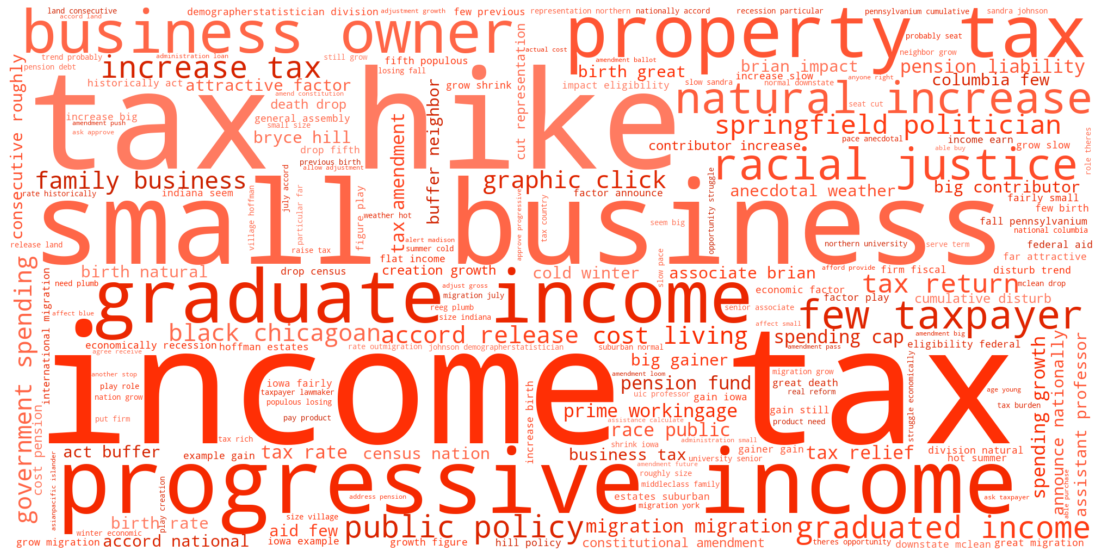

In [272]:
wordCloud_bigrams(negative_words_list, 'negative', 'negative_sentiment_Population_decline.png')

## Now lets do a word cloud of  the reasons for the businesses to move to Illinois or stay in Illinois

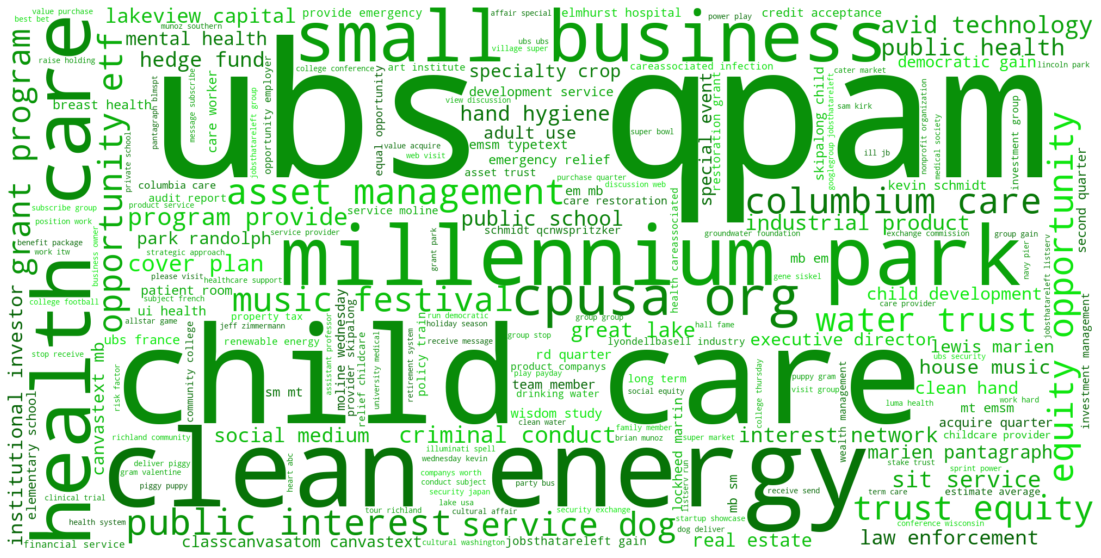

In [166]:
wordCloud_bigrams(pos_words_list_biz, 'positive', 'negative_sentiment.png')

## Now lets do a word cloud of the reasons for the Residents or citizens to move to Illinois or stay in Illinois

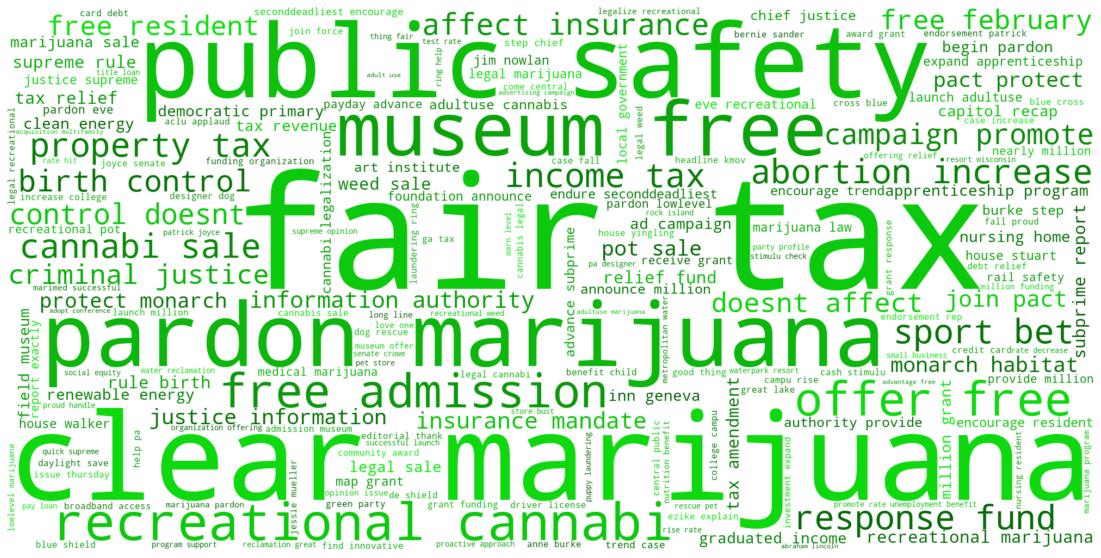

In [117]:
wordCloud_bigrams(pos_words_list_res, 'positive', 'positive_sentiment.png')

# 3rd approach for sentiment analysis

In [159]:
news_data = news_df.drop(['polarity_score'], axis =1)

In [160]:
news_data.shape

(33270, 6)

In [ ]:
Lets build a basic Naive bayes classifier to classifier each article based on positive/negative/neutral sentiments

In [164]:
def features_words(words):
    return dict([(w, True) for w in words])

In [165]:
vocabulary_positive = [ 'awesome', 'launch','outstanding','thrive', 'fantastic', 'reform','terrific', 'reforms','good','celebration',
 'nice', 'hope','great', 'fun','jobs','opportunity','opportunities','staffing','freedom','create','potential','creation','hopes',':)' 'sustainable','complete','grow','heal','free','upgrade','solution','surprise','fair','award','winner','won',
    'good','sunny',]
vocabulary_negative = [ 'decline','bad', 'declined','terrible','useless','refrain', 'hate', 'injustice',':(','burden','hike','fall','challenge',
 'oppose','defeat','restriction','burdensome','lawsuits','sue','dysfunctional','charged','Troops','killed','died','casualties','supremacist',
'rcaial','racist','attack','disgaree','bogus','fake','worsen','slip','closure','closures','bankruptcy','riots','critique','restrain','blood',
                      'casualty','exacerbates','exacerbate','war','conflict','military','attack','ghetto','southside']
vocabulary_neutral = [ 'movie','bears','cubs','the','Bulls','bulls','sound','automobile','was','is','actors','did','know','words','not' ]

In [167]:
feature_pos = [(features_words(i), 'positive') for i in vocabulary_positive]
feature_neg = [(features_words(j), 'negative') for j in vocabulary_negative]
feature_neu = [(features_words(k), 'neutral') for k in vocabulary_neutral]

In [168]:
training_set = feature_pos + feature_neg + feature_neu

In [169]:
nb_classifier = NaiveBayesClassifier.train(training_set) 

In [170]:
# Predict
neg = 0
pos = 0
sentence = "Awesome movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')
for word in words:
    classResult = nb_classifier.classify(features_words(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1

print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.0
Negative: 0.0


# Using TextBlob for sentiment analysis

In [171]:
news_data['polarity_score'] = news_data.apply(lambda x: TextBlob(x['title']).sentiment.polarity, axis=1)
news_data['subjectivity'] = news_data.apply(lambda x: TextBlob(x['title']).sentiment.subjectivity, axis=1)

In [173]:
pd.set_option('display.max_colwidth', 100)

In [174]:
news_data[['title','polarity_score','subjectivity']].head(20)

title  \
50592   Comment on Trump Calls Beirut Explosion “A Terrible Attack …A Bomb Of Some Kind” After Briefed B...   
138895  World News (Mar 20, 2020 EDN): Stocks Suffer Worst Week Since Lehman Despite Biggest Fed Bailout...   
273101  The point of this is to identity an experience. A young boy was raised as a Tomahawk Indian and ...   
137775  If you think the Law is not about thieving from people and taking from people, then I will break...   
137776  If you think the Law is not about thieving from people and taking from people, then I will break...   
214946  Poor city, state response to rioting aiding Trump’s re-election Just a week ago Mayor Lightfoot ...   
303938  Comment on US Troops Injured After Russian Chopper & Vehicles Gave Chase To American Convoy In S...   
201448  US Troops Injured After Russian Chopper & Vehicles Gave Chase To American Convoy In Syria – Ever...   
53316   Egon Von Greyerz: A Hyperinflationary Depression Has Always Been The Inevitable Endgame – Retail...   
219353  Jose Maysonet: Illinois; Stand by for a really neat twist: Most of us have heard about the notor...   
242073  Minneapolis looks like a #WarZone after the #Antifa & #BlackLivesMatter riots (Video) – Belgium:...   
47229   Stanley Wrice: False confession case. 'Coerced' confession doesn't work. This was sheer torture....   
273057  The point of this os to identity an experience. A young boy was raised as a Tomahawk Indian and ...   
160621  It is Chicago the musical! Here's another one for you: Sad girl sings catchy yet sad song. Sad g...   
227298  The point of this is to identity an experience. A young boy was raised as a Tomahawk Indian and ...   
83628   Chicago Murder Rate Soars Despite Stay-At-Home Orders, Activists Blame “Lockdown Segregation” – ...   
306685  FRAUD & HOKUM'S JOURNALAfter Another Rare CONVICTION OF A POLICE OFFICER For Killing An UNARMED ...   
73793   World News (Jan 30, 2020 EDN): Mask off: JARED KUSHNER: “PALESTINIANS HAVE NEVER DONE ANYTHING R...   
12713   Democrats have trapped themselves on the riots and other commentaryFrom the left: Dems Just Got ...   
236618  Cooked: Survival By Zip Code (2019) - tells story tragic 1995 Chicago heatwave, the traumatic in...   

        polarity_score  subjectivity  
50592        -0.086792      0.388638  
138895        0.037239      0.488984  
273101        0.089324      0.463345  
137775        0.033468      0.401976  
137776        0.033468      0.401976  
214946       -0.001443      0.525953  
303938        0.004085      0.447638  
201448        0.004085      0.447638  
53316        -0.085880      0.457407  
219353        0.067361      0.184028  
242073       -0.400000      0.563333  
47229        -0.055952      0.437381  
273057        0.032143      0.471429  
160621       -0.287821      0.795513  
227298        0.058488      0.418105  
83628        -0.151111      0.177778  
306685        0.127381      0.402381  
73793        -0.062297      0.542623  
12713         0.048751      0.414397  
236618       -0.153061      0.423469

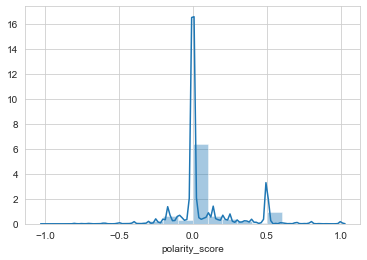

In [176]:
sns.set_style("whitegrid")
sns.distplot(news_data['polarity_score'],bins=20)

# Articles of positive sentiment 

In [202]:
news_positive = news_data[['title', 'polarity_score', 'subjectivity']][news_data['polarity_score'] > 0.4]
news_positive.shape

(3899, 3)

In [203]:
news_positive.head(20)

title  \
164603  REVEALED: Top Chicago prosecutor Kim Foxx's office has dismissed more than 25,000 felony cases -...   
196182  Top Chicago prosecutor Kim Foxx’s office has dismissed more than 25,000 felony cases – including...   
154470           Chicago Fire Spoilers: Is Brett Doomed For Heartbreak After The Latest Family Development?   
187423  ICE chief scorches Chicago mayor for glib response to latest sanctuary city horror crime | VOICE...   
187669  ICE chief scorches Chicago mayor for glib response to latest sanctuary city horror crime (Adam S...   
33597   Fund the police! Chicago sees a huge decrease in murders by using more cops and arresting armed ...   
79174   The Chicago Way w/John Kass: A city hurting deals with more unrest, but Charles Lispon sees a br...   
98181   Does anything good happen in Illinois? W.Va. mom heartbroken by daughter's 'VanJumping' death on...   
171326  Therapy dog: Comfort dog sworn in at state's attorney's office to help victims of sexual assault...   
329498  Michelle Obama’s Brother Recalls The “Heartbreaking” Time Chicago Police Accused Him Of Stealing...   
250181  MINNEAPOLIS: Officers were investigating a confirmed stolen vehicle in area of 37th & Chicago Av...   
338792                Illinois man charged with sexual assault after taking bank employee hostage - UPI.com   
352168                          Illinois man charged with sexual assault after taking bank employee hostage   
119229                                     Pair of prominent attorneys stabbed to death inside Chicago home   
210902      Illinois man accused of sexually assaulting 5-year-old child in home invasion | MyStateline.com   
294519  Parolee Accused of Punching, Sexually Assaulting 91-Year-Old Woman in University Village – NBC C...   
239317  Looting causes 2-year-old Chicago boy battling cancer to miss his own birthday party | News Head...   
189553                    Chicago bridal shop makes masks for hospitals, jails, more during COVID-19 crisis   
341905                                R. Kelly’s Chicago Sexual Abuse Trial Will Not Start Until Sept. 2020   
260609  Archdiocese of Chicago removes Father Daniel McCarthy from St. Elizabeth of the Trinity amid sex...   

        polarity_score  subjectivity  
164603            0.50      0.611111  
196182            0.50      0.583333  
154470            0.50      0.900000  
187423            0.50      0.900000  
187669            0.50      0.900000  
33597             0.45      0.700000  
79174             0.50      0.500000  
98181             0.70      0.600000  
171326            0.50      0.833333  
329498            0.60      1.000000  
250181            0.45      0.750000  
338792            0.50      0.833333  
352168            0.50      0.833333  
119229            0.50      1.000000  
210902            0.50      0.833333  
294519            0.50      0.833333  
239317            0.60      1.000000  
189553            0.50      0.500000  
341905            0.50      0.833333  
260609            0.50      0.833333

# Articles of Negative sentiment 

In [191]:
news_negative = news_data[['title', 'polarity_score', 'subjectivity']][news_data['polarity_score'] < -0.1]
news_negative.shape

(2770, 3)

In [192]:
news_negative.head(10)

title  \
242073  Minneapolis looks like a #WarZone after the #Antifa & #BlackLivesMatter riots (Video) – Belgium:...   
160621  It is Chicago the musical! Here's another one for you: Sad girl sings catchy yet sad song. Sad g...   
83628   Chicago Murder Rate Soars Despite Stay-At-Home Orders, Activists Blame “Lockdown Segregation” – ...   
236618  Cooked: Survival By Zip Code (2019) - tells story tragic 1995 Chicago heatwave, the traumatic in...   
88589   Patrick Pursley: Illinois: Flawed Ballistics: Crime lab defendants suffer setback in civil lawsu...   
309191  The Horrifying True Story of the 1982 Chicago Tylenol Murders – In 1982, six adults and one 12-y...   
136363  Illinois Appellate Court Affirms $3.5 Million Wrongful Death Verdict for Failure to Communicate ...   
78605   Black Criminals and ANTIFA fascists invade Cicero. Illinois and battle Mexican-Americans in mass...   
212120  (10848148) "What Chicago's Ultimate Bad Cop Taught Me About Police Reform." Subby, who did crimi...   
158850  #GrandSolarMinimum (Nov 11, 2019 EDN): Hello Greta: Here’s the weather forecast for Sweden: Now ...   

        polarity_score  subjectivity  
242073       -0.400000      0.563333  
160621       -0.287821      0.795513  
83628        -0.151111      0.177778  
236618       -0.153061      0.423469  
88589        -0.157143      0.400000  
309191       -0.270000      0.660000  
136363       -0.258333      0.150000  
78605        -0.122222      0.611111  
212120       -0.438095      0.773810  
158850       -0.187500      0.533333

In [204]:
news_neutral = news_data[['title', 'polarity_score', 'subjectivity']][news_data['polarity_score'] == 0 ]
news_neutral.shape

(19642, 3)

In [205]:
news_neutral.head(20)

title  \
141236                       Chicago Fire Department Fights Breast Cancer alongside American Cancer Society   
291656                             Former Chicago businessman facing murder charges in Mumbai terror attack   
277050  Trump demands NYC Mayor de Blasio REHIRE all NYPD cops fired after he cut $1bn in funding and co...   
105150  Purpose Over Pain partners with local flower shop to help grieving Chicago gun violence victims'...   
2388    Central business district. Fire at 203 west Lake street. Still alarm. Image nails facial and wax...   
69630   After her son’s murder, a Chicago mother asks the community to speak up and speak out against gu...   
201458  Unemployment Fraud Complaints Soar 2000% For Illinois Department Of Employment Security; Not Cou...   
128543      Beck reflects on his time in Chicago battling COVID-19 and the city’s stubborn violence problem   
335032  Vast government over-reaction to COVID19? Risk of depression lives lost v. risk of virus lives l...   
81032   Working Apartment Fire (Huntley) Huntley Fire and Mutual Aid FDs on scene in the 10000 Block of ...   
269910  Department of Defense searching for family of local soldier who died as prisoner of war | East C...   
320747               Chicago teenagers charged with murder in death of store owner during attempted robbery   
102476  October, 2020, Part 6, Political Class Insanity: The Clinton Books Bomb, The Chicago Mayor's Hor...   
220525  August crime stats: Summer violence drops in August, but murders up 50% from 2019: CPD - Chicago...   
103896  [Illinois] Lost one of two part time jobs, filed for unemployment to cover that financial loss. ...   
294474            5 Chicago """ """ teens """ """ charged with murder in fatal attempted suburban car theft   
246697                             Illinois: Thomas Dart suspected in conspiracy to murder anti-vaccine Dr.   
193402                       Suspect in 2016 Spartanburg Co. murder arrested in Illinois, U.S. Marshals say   
214881  BREAKING: Antifa terrorists to be bused to Sparta, Illinois with orders to burn farm houses and ...   
227041  BREAKING: Antifa terrorists to be bused to Sparta, Illinois with orders to burn farm houses and ...   

        polarity_score  subjectivity  
141236             0.0         0.000  
291656             0.0         0.000  
277050             0.0         0.000  
105150             0.0         0.000  
2388               0.0         0.125  
69630              0.0         0.000  
201458             0.0         0.000  
128543             0.0         0.000  
335032             0.0         1.000  
81032              0.0         0.000  
269910             0.0         0.000  
320747             0.0         0.000  
102476             0.0         0.100  
220525             0.0         0.000  
103896             0.0         0.000  
294474             0.0         0.000  
246697             0.0         0.000  
193402             0.0         0.000  
214881             0.0         0.000  
227041             0.0         0.000

In [ ]:
Now we have to create one more column to the news_data dataframe

In [223]:
# lets create a list to label the sentiments
list_sentiments = []

In [224]:
# For each row in the column,
for i in news_data['polarity_score']:
    if i > 0.40:
        list_sentiments.append('positive')
    elif i < -0.1:
        list_sentiments.append('negative')
    else:
        list_sentiments.append('neutral')


In [225]:
# Create a column from the list
news_data['label_sentiment'] = list_sentiments

In [226]:
news_data.head(10)

crawled_date language  \
50592   1596585600000  english   
138895  1584748800000  english   
273101  1579737600000  english   
137775  1579910400000  english   
137776  1579910400000  english   
214946  1591228800000  english   
303938  1598572800000  english   
201448  1598486400000  english   
53316   1587254400000  english   
219353  1584403200000  english   

                                                                                                       text  \
50592   Trump Calls Beirut Explosion "A Terrible Attack – A Bomb Of Some Kind" After Briefed By Generals...   
138895  Infinite Unknown The man who trades freedom for security does not deserve nor will he ever recei...   
273101  The point of this is to identity an experience. A young boy was raised as a Tomahawk Indian and ...   
137775  If you think the Law is not about thieving from people and taking from people, then I will break...   
137776  If you think the Law is not about thieving from people and taking from people, then I will break...   
214946  Just a week ago Mayor Lightfoot blasted her new Police Chief David Brown for his failure to stem...   
303938  US Troops Injured After Russian Chopper & Vehicles Gave Chase To American Convoy In Syria\nChaot...   
201448  US Troops Injured After Russian Chopper & Vehicles Gave Chase To American Convoy In Syria\nChaot...   
53316   — Infinite Unknown (@SecretNews) April 18, 2020 Retail Sales Were Bad; The Reality Is Catastroph...   
219353  \nPUBLISHER'S NOTE: This Blog is interested in false confessions because of the disturbing numbe...   

                                                                                                      title  \
50592   Comment on Trump Calls Beirut Explosion “A Terrible Attack …A Bomb Of Some Kind” After Briefed B...   
138895  World News (Mar 20, 2020 EDN): Stocks Suffer Worst Week Since Lehman Despite Biggest Fed Bailout...   
273101  The point of this is to identity an experience. A young boy was raised as a Tomahawk Indian and ...   
137775  If you think the Law is not about thieving from people and taking from people, then I will break...   
137776  If you think the Law is not about thieving from people and taking from people, then I will break...   
214946  Poor city, state response to rioting aiding Trump’s re-election Just a week ago Mayor Lightfoot ...   
303938  Comment on US Troops Injured After Russian Chopper & Vehicles Gave Chase To American Convoy In S...   
201448  US Troops Injured After Russian Chopper & Vehicles Gave Chase To American Convoy In Syria – Ever...   
53316   Egon Von Greyerz: A Hyperinflationary Depression Has Always Been The Inevitable Endgame – Retail...   
219353  Jose Maysonet: Illinois; Stand by for a really neat twist: Most of us have heard about the notor...   

                                                                                                 total_text  \
50592   trump call beirut explosion terrible attack bomb kind briefed generalsdid trump reveal sensitive...   
138895  infinite trade freedom security deserve ever receive either benjamin franklin world mar edn stoc...   
273101  point identity experience young raise tomahawk indian witness suffer law emerge civilization the...   
137775  think law thieve take break law public understand experience testimony story glory hallelujah po...   
137776  think law thieve take break law public understand experience testimony story glory hallelujah po...   
214946  week ago mayor lightfoot blast police chief david brown failure stem memorial day violence shot ...   
303938  troop injure russian chopper vehicle give chase convoy syriachaotic footage show rival power eng...   
201448  troop injure russian chopper vehicle give chase convoy syriachaotic footage show rival power eng...   
53316   infinite secretnews april retail sale bad reality catastrophicforget march retail sale datum rea...   
219353  publisher note blog interested false confession disturb number exonerati

neutral     26601
positive     3899
negative     2770
dtype: int64


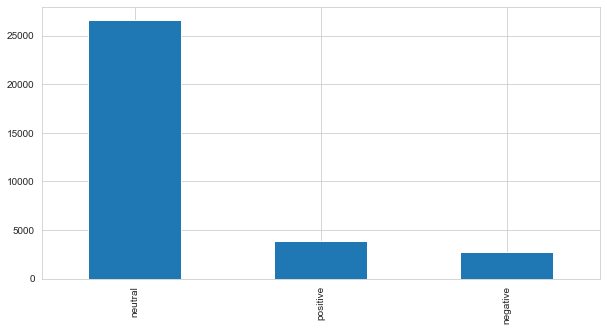

In [228]:
plt.figure().set_size_inches(10, 5)

sentiment_values = pd.value_counts(news_data['label_sentiment'].values, sort=True)
print (sentiment_values)

#CountSentiment.plot.barh()
sentiment_values.plot.bar()

In [231]:
positive_news = news_data[news_data['label_sentiment'].isin(['positive'])]
positive_news.head(10)

crawled_date language  \
164603  1597104000000  english   
196182  1599609600000  english   
154470  1583366400000  english   
187423  1584057600000  english   
187669  1584057600000  english   
33597   1599004800000  english   
79174   1591056000000  english   
98181   1575331200000  english   
171326  1572480000000  english   
329498  1600387200000  english   

                                                                                                       text  \
164603  Cook County State's Attorney Kim Foxx has dismissed more than 25,000 felony cases - including ma...   
196182  Cook County State’s Attorney Kim Foxx has dismissed more than 25,000 felony cases – including ma...   
154470  Chicago Fire Spoilers: Is Brett Doomed For Heartbreak After The Latest Family Development? By La...   
187423  ICE chief scorches Chicago mayor for glib response to latest sanctuary city horror crime By 0 EX...   
187669                                                                                                  25    
33597   In the midst of a massive push to defund police departments everywhere, Chicago is showing what ...   
79174   Jun 2, 2020 / 12:23 PM CDT / Updated: Jun 2, 2020 / 11:39 AM CDT\nThe front window of Brindille ...   
98181   She didn't jump to end her life, this was my daughter A comment was just recently posted by the ...   
171326  Therapy dog: Comfort dog sworn in at state's attorney's office to help victims of sexual assault...   
329498  Home / News / Michelle Obama’s Brother Recalls The “Heartbreaking” Time Chicago Police Accused H...   

                                                                                                      title  \
164603  REVEALED: Top Chicago prosecutor Kim Foxx's office has dismissed more than 25,000 felony cases -...   
196182  Top Chicago prosecutor Kim Foxx’s office has dismissed more than 25,000 felony cases – including...   
154470           Chicago Fire Spoilers: Is Brett Doomed For Heartbreak After The Latest Family Development?   
187423  ICE chief scorches Chicago mayor for glib response to latest sanctuary city horror crime | VOICE...   
187669  ICE chief scorches Chicago mayor for glib response to latest sanctuary city horror crime (Adam S...   
33597   Fund the police! Chicago sees a huge decrease in murders by using more cops and arresting armed ...   
79174   The Chicago Way w/John Kass: A city hurting deals with more unrest, but Charles Lispon sees a br...   
98181   Does anything good happen in Illinois? W.Va. mom heartbroken by daughter's 'VanJumping' death on...   
171326  Therapy dog: Comfort dog sworn in at state's attorney's office to help victims of sexual assault...   
329498  Michelle Obama’s Brother Recalls The “Heartbreaking” Time Chicago Police Accused Him Of Stealing...   

                                                                                                 total_text  \
164603  cook county state attorney kim foxx dismiss felony case include many involve charge murder serio...   
196182  cook county state attorney kim foxx dismiss felony case include many involve charge murder serio...   
154470  chicago fire spoiler brett doom heartbreak late family development laura hurley mar pmspoiler ah...   
187423  ice chief scorch chicago mayor glib response late sanctuary city horror crime exclusive intervie...   
187669           ice chief scorch chicago mayor glib response late sanctuary city horror crime adam shawfox   
33597   midst massive push defund police department everywhere chicago show work tackle crime cop equal ...   
79174   jun pm cdt update jun cdtthe front window brindille restaurant bust looter sweep chicago central...   
98181   didnt jump end life daughter comment recently post mother decease child seek longterm rehab faci...   
171326  therapy dog comfort dog swear state attorney office help victim sexual assault violence www cbsn...   
329498  michelle obama brother recall heartbreaking time chicago police accuse s

In [285]:
nlp=en_core_web_sm.load()

In [316]:
ner_df = original_df

In [292]:
original_df.shape

(270415, 4)

In [317]:
ner_df['title'] = ner_df['title'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [318]:
regex = re.compile('['+re.escape(string.punctuation)+'0-9\\r\\t\\n]')
ner_df['title'] = ner_df['title'].map(lambda x: regex.sub(' ',x))

In [319]:
thread_pool = multiprocessing.Pool(processes=12)
ner_df['title'] = thread_pool.map(nltk.tokenize.word_tokenize, ner_df['title'])
thread_pool.close()

In [320]:
thread_pools = multiprocessing.Pool(processes=10)
ner_df['title'] = thread_pools.map(preprocess_text, ner_df['title'])
thread_pools.close()

In [321]:
ner_df['title'] = [' '.join(x) for x in ner_df['title']]

In [322]:
ner_df['title'].head(20)

0                                                                                                                                     
1                                                                                   department public health announce additional death
2                                                                                                                    foto friday alton
4                                                                                 pork chop v appetite meat risk worker safety tribune
5                                                                                                   dead least injured shooting across
6                                                                                                                      lasalle restore
8                                                                                                           know di love fricking much
9                                                      

In [329]:
document = nlp(str(df['title']))

In [330]:
entities = []
labels = []
position_start = []
position_end = []

for ent in document.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
results = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

results.head(20)

Entities    Labels  Position_Start  Position_End
0           (1)  CARDINAL             142           143
1           (2)  CARDINAL             284           285
2      (friday)      DATE             413           419
3       (alton)       ORG             420           425
4           (4)  CARDINAL             426           427
5           (5)  CARDINAL             568           569
6      (371783)  CARDINAL             852           858
7      (371785)  CARDINAL            1136          1142
8   (september)      DATE            1208          1217
9      (371787)  CARDINAL            1420          1426
10     (270415)      DATE            1583          1589

In [331]:
Counter(labels)

Counter({'CARDINAL': 7, 'DATE': 3, 'ORG': 1})

Now we will mostly try to target only the organizations or businesses, people and GPE within the labels

In [332]:
biz_count = [i.text for i in document.ents if i.label_ == "ORG"]

In [333]:
Counter(biz_count).most_common(20)

[('alton', 1)]

# Using NLTK NER

In [14]:
def create_entities_labels_org(x):
    entities = []
    labels = []

    # chunking the entire title and text using NLTK into sentences in the form of a tree structire ot list of lists.
    # The values can be retrieved by traversing the trees or list of lists
    
    for i in nltk.sent_tokenize(x):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(i)), binary = False):
            if hasattr(chunk, 'label') and chunk.label()=='ORGANIZATION':
                entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
                labels.append(chunk.label())

    entities_labels = list(zip(entities, labels))  #unique entities
    entities_df = pd.DataFrame(entities_labels)
    if entities_df.empty:
        return pd.DataFrame({'entity':[], 'label':[], 'Count':[]})
    else:
        entities_df.columns = ["entity", "label"]
        return entities_df.groupby(['entity']).label.value_counts().reset_index(name='Count')

In [15]:
def aggregate_labels(item):
    item = item.sort_values('Count', ascending=False)
    return item.groupby('entity').agg({'label' : lambda x: x.iloc[0], 'Count' : 'sum', }).reset_index()

In [ ]:
org_labels_text = []
org_labels_title = []

for i, each_row in original_df.iterrows():
    
    labels_in_text = aggregate_labels(create_entities_labels_org(each_row['text']))
    labels_in_text['no_of_articles'] = 1
    org_labels_text.append(labels_in_text)
    
    labels_in_titles = aggregate_labels(create_entities_labels_org(each_row['title']))
    labels_in_titles['no_of_articles'] = 1
    org_labels_title.append(labels_in_titles)
    
org_text_concat  = pd.concat(org_labels_text)
org_title_concat = pd.concat(org_labels_title)


In [ ]:
org_results_df = pd.merge(
    org_text_concat.groupby(['entity', 'label'])\
        .agg({'Count':'sum', 'no_of_articles': 'sum'})\
        .reset_index()\
        .rename(columns={'Count':'mentions_articles'}),
    org_title_concat.groupby(['entity', 'label'])\
        .agg({'Count':'sum', 'no_of_articles': 'sum'})\
        .reset_index()\
        .rename(columns={
            'Count':'mentions_titles', 
            'no_of_articles': 'no_of_titles'}),
    how='outer',
    on=['entity', 'label']).fillna(0)

# Standford NER

In [10]:
# Change the path according to your system
stanford_classifier = os.getenv('STANFORD_CLASSIFIER')
stanford_ner_path = os.getenv('STANFORD_NER_PATH')

# Creating Tagger Object
st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')

In [ ]:

entities = []
labels = []
for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(str(text))), binary = False):
    if hasattr(chunk, 'label'):
        entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
        labels.append(chunk.label())

entities_labels = list(set(zip(entities, labels))) #unique entities

In [ ]:
text=data['text']
tokenized_text = word_tokenize(str(text))
classified_text = st.tag(tokenized_text)

In [ ]:
netagged_words = classified_text

entities = []
labels = []

from itertools import groupby
for tag, chunk in groupby(classified_text, lambda x:x[1]):
    if tag != "O":
        entities.append(' '.join(w for w, t in chunk))
        labels.append(tag)

In [ ]:
entities_all = list(zip(entities, labels))
entities_unique = list(set(zip(entities, labels))) #unique entities

In [ ]:
entities_df = pd.DataFrame(entities_unique)
entities_df.columns = ["Entities", "Labels"]


In [ ]:
Org_df = entities_df.loc[entities_df["Labels"].isin(['ORGANIZATION'])]
person_df=entities_df.loc[entities_df["Labels"].isin(['PERSON'])]
person_df.head(5)